# Table of Contents


## [0. Import Monk](#0)

## [1.Import Dataset From Kaggle](#1)

## [2. Import Libraries](#2)


## [3.Data parser to ingest, explore, and visualize samples.](#3)

## [4. Developing Classifier Models](#4)

## [5.Comparing Models and performing Inferences](#5)

#Import Monk

git clone https://github.com/Tessellate-Imaging/monk_v1.git

cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

In [ ]:
#Clone Monk AI library github repository
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 182, done.
remote: Counting objects: 100% (182/182), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 4722 (delta 119), reused 93 (delta 51), pack-reused 4540
Receiving objects: 100% (4722/4722), 114.64 MiB | 28.27 MiB/s, done.
Resolving deltas: 100% (3015/3015), done.
Checking out files: 100% (1468/1468), done.


In [ ]:
#Install Requirements for Colab
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

     |████████████████████████████████| 710.5MB 27kB/s 
     |████████████████████████████████| 757kB 40.8MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=9b6d653ee7c47b8b724d0b953064ab3f83b1492dead46da4b20a2bbfc46540e6
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built GPUtil
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


#Import Dataset from Kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
#Create a new API by clicking My Account icon in kaggle
#Download kaggle.json
#Upload in colab file using files.upload()

from google.colab import files

files.upload()#Upload the kaggl.json file here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sanskar123","key":"e5de88bd0411ebbc1591af636c3adfe6"}'}

In [ ]:

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Download the full dataset zip file to Colab 
! kaggle datasets download -d 'olgabelitskaya/classification-of-handwritten-letters'

 95% 172M/181M [00:02<00:00, 40.9MB/s]
100% 181M/181M [00:02<00:00, 65.1MB/s]


In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1EHsJ-sXMNIbZiiVmyl7FuqnLX50kx04k' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1EHsJ-sXMNIbZiiVmyl7FuqnLX50kx04k" -O sample.zip && rm -rf /tmp/cookies.txt

--2020-07-26 13:39:52--  https://docs.google.com/uc?export=download&id=1EHsJ-sXMNIbZiiVmyl7FuqnLX50kx04k
Resolving docs.google.com (docs.google.com)... 74.125.142.101, 74.125.142.139, 74.125.142.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.19K  --.-KB/s    in 0s      

2020-07-26 13:39:52 (41.2 MB/s) - written to stdout [3262]

--2020-07-26 13:39:52--  https://docs.google.com/uc?export=download&confirm=mJ9W&id=1EHsJ-sXMNIbZiiVmyl7FuqnLX50kx04k
Resolving docs.google.com (docs.google.com)... 74.125.195.101, 74.125.195.138, 74.125.195.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-bo-docs.googleusercontent.com/docs/securesc/3n40oq4ca2lb7t6m9tm2ibvomvi2r3h0/9844ap4aso

In [ ]:
! unzip -qq sample.zip

In [ ]:
#Unzip the downloaded zip file and put it under a new files section
import zipfile
zip_ref = zipfile.ZipFile('classification-of-handwritten-letters.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

#Import Libraries

In [ ]:
import os
import sys
sys.path.append("monk_v1/monk/");

In [ ]:
#Importing MXNet Gluon API backend
from gluon_prototype import prototype

In [ ]:
import pandas as pd

#Data parser to ingest, explore, and visualize samples.

In [ ]:
#Reading each csv file corresponding to the images
df1=pd.read_csv('/content/files/letters.csv')
df2=pd.read_csv('/content/files/letters2.csv')
df3=pd.read_csv('/content/files/letters3.csv')

In [ ]:
#Visualizing a sample content of CSV file
df1.head()

letter  label       file  background
0      а      1  01_01.png           0
1      а      1  01_02.png           0
2      а      1  01_03.png           0
3      а      1  01_04.png           0
4      а      1  01_05.png           0

In [ ]:
#Dropping letters as we have it encoded in form of label in the another column
#Dropping background column as it does not contribute to target
df1.drop(['letter', 'background'], axis = 1,inplace=True) 
df2.drop(['letter', 'background'], axis = 1,inplace=True)
df3.drop(['letter', 'background'], axis = 1,inplace=True) 

In [ ]:
#Keeping columns of the CSV file in desired order
df1 = df1[['file','label']]
df2 = df2[['file','label']]
df3 = df3[['file','label']]

In [ ]:
#Visualizing updated DataFrames
df1.head()

file  label
0  01_01.png      1
1  01_02.png      1
2  01_03.png      1
3  01_04.png      1
4  01_05.png      1

In [ ]:
#Generating CSV files containing the updated dataframes  
df1.to_csv("files/sanskars1.csv",index=False)
df2.to_csv("files/sanskars2.csv",index=False)
df3.to_csv("files/sanskars3.csv",index=False)

#Resnet34

In [ ]:
#Setup Project Name and Experiment Name
gtf = prototype(verbose=1);
gtf.Prototype("Pilot", "Resnet");

Mxnet Version: 1.6.0

Experiment Details
    Project: Pilot
    Experiment: Resnet
    Dir: /content/workspace/Pilot/Resnet/



I have not concatenated the 3 csv file together and also the 3 images folders which could lead me to train the entire dataset alltogether
This is because all three have slighly different types of backgrounds.

My approach to building a robust model is by training the model first by using the images which are least affected by the background ,
i.e. letter2 folder .
Also the letter2 dataset is reasonably big (Unlike letter folder) so it can train the model effectively at first.

This would ensure that my model trains and learns to extract desired features and we can verify it by analysing plots for the same.
if we infer that the model learns well on plain background and has learned to extract the correct features , then we continue training the model with letter3 folder which contains images with graph paper background , this dataset is also very big to make so hopefully it makes the model learn to ignore lines in the background.

Then , we continue training the model with letter folder images , which is quite small database , containing gridded and stripped background.



In [ ]:
#Setup the model with images in letter2 folder 
gtf.Default(dataset_path="/content/files/letters2", 
            path_to_csv ="/content/files/sanskars2.csv",
            model_name="resnet34_v2", 
            freeze_base_network=False,
            delimiter = ",",
            num_epochs=5);

Dataset Details
    Train path:     /content/files/letters2
    Val path:       None
    CSV train path: /content/files/sanskars2.csv
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   2
    Train-val split:   0.7
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 4158
    Num val images:   1782
    Num classes:      33

Model Params
    Model name:           resnet34_v2
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model


100%|██████████| 79087/79087 [00:01<00:00, 56392.56KB/s]


    Model Loaded on device
        Model name:                           resnet34_v2
        Num of potentially trainable layers:  72
        Num of actual trainable layers:       71

Optimizer
    Name:          sgd
    Learning rate: 0.01
    Params:        {'lr': 0.01, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   steplr
    Params: {'step_size': 1, 'gamma': 0.98, 'last_epoch': -1}

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}

Training params
    Num Epochs: 5

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_



monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [ ]:
#Shuffle the training data is required because the data is ordered w.r.t labels
gtf.update_shuffle_data(True);
gtf.Reload();

Update: Data shuffle - True

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 4158
    Num val images:   1782
    Num classes:      33

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet34_v2
        Num of potentially trainable layers:  72
        Num of actual trainable layers:       71



In [ ]:
#Visualizing the models available with Mxnet-Gluon Backend
gtf.List_Models()

My Base approach to developing the models for this project was :

1.)First , I selected basic models from models that are available in MXNet Gluon Backend.

2.)I have considered less dense networks for model at first and analysed those networks as to which gives me good performance. I have not just  consider the best model according to val loss , have kept few good  models as they might look better after tuning and increased depth. 

3.)Then i have Tuned the parameters for these models.

4.)After obtaining the optimal hyper parameters, with the same hyperparameters i have tried  dense network for the same model which may increase accuracy.

so , here i have chosen some basic networks and analysed which might works better for me .

In [ ]:
#Analysing basic model
#Inception and exception networks were consuming too much computational time and space
analysis_name = "analyse_models";
models = [["resnet34_v2", False, True],["densenet121", False, True],["vgg16", False, True],["alexnet",False,True],["mobilenetv2_1.0",False , True]];
epochs=5
percent_data=15
analysis = gtf.Analyse_Models(analysis_name, models, percent_data, num_epochs=epochs, state="keep_all");


Running Model analysis
Analysis Name      : analyse_models

Running experiment : 1/5
Experiment name    : Model_resnet34_v2_unfreeze_base_pretrained
Estimated time     : 2 min
Experiment Complete


Running experiment : 2/5
Experiment name    : Model_densenet121_unfreeze_base_pretrained
Estimated time     : 4 min
Experiment Complete


Running experiment : 3/5
Experiment name    : Model_vgg16_unfreeze_base_pretrained
Estimated time     : 6 min
Experiment Complete


Running experiment : 4/5
Experiment name    : Model_alexnet_unfreeze_base_pretrained
Estimated time     : 2 min
Experiment Complete


Running experiment : 5/5
Experiment name    : Model_mobilenetv2_1.0_unfreeze_base_pretrained
Estimated time     : 48 min
Experiment Complete


Comparing Experiments
Comparison ID:      Comparison_analyse_models
Generated statistics post all epochs
| Experiment Name                                |   Train Acc |   Val Acc |   Train Loss |   Val Loss |
|-------------------------------------------

<Figure size 432x288 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

From the comparison made , it is clear that  densenets , resnets and even mobilenets can give very good performance .

But the width of mobilenets is highest , i.e. it is deepest amongst all its variants like mobilenetsv2_0.75 , mobilenetsv2_0.5 etc .
I should have used 0.25 or 0.5 variant but i did it for full width one which took a lot of time and space.
Also , if i use lower variants , the performance is likely to go low (Although its not always true ).
Still , if we see the documentation , the accuracy has gone down(With Image Net dataset) .
This might not be the case in this model.
I am not building mobilenets for this project , but it might yield good results.


In [ ]:
# I have analysed batch size , learning rate and optimizers and tuned them according to validation and training loss.
#Batch size 4 didn't work out for the model , and batch size more than 8 started increasing the validation loss , so batch size 8 is selected 
gtf.update_batch_size(8);
#learning rate 0.1 and 0.05 were not working well ,lr lesser than that didn't vary much w.r.t almost same val and training loss , so 0.01 best choice  
gtf.update_learning_rate(.01);
#Though optimizers like Adam and its variants are very fast at converging but the problem with them are they sometimes get stuck at local optima's.Mostly this is the case that they didn,t work well here.      
#Whereas famous optimizers linke SGD and SGD plus momentum are slower to converge , but they dont get stuck at local optima easily.
# Here after analysing all these optimizers , sgd worked better.
gtf.optimizer_sgd(0.01);
gtf.Reload();


Update: Batch size - 8

Update: Learning Rate - 0.01

Optimizer
    Name:          sgd
    Learning rate: 0.01
    Params:        {'lr': 0.01, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}





monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 4158
    Num val images:   1782
    Num classes:      33

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet34_v2
        Num of potentially trainable layers:  72
        Num of actual trainable layers:       71



In [ ]:
#Now that we have tuned important parameters , we move to denser networks with Resnets.
#This takes time but it produces valuable results.
analysis_name = "analyse_models";
models = [["resnet34_v2", False, True],["resnet50_v2", False, True],["resnet101_v2", False, True],["resnet152_v2",False,True]];
epochs=5
percent_data=15
analysis = gtf.Analyse_Models(analysis_name, models, percent_data, 
                              num_epochs=epochs, state="keep_all");


Running Model analysis
Analysis Name      : analyse_models

Running experiment : 1/4
Experiment name    : Model_resnet34_v2_unfreeze_base_pretrained
Estimated time     : 2 min
Experiment Complete


Running experiment : 2/4
Experiment name    : Model_resnet50_v2_unfreeze_base_pretrained
Estimated time     : 3 min
Experiment Complete


Running experiment : 3/4
Experiment name    : Model_resnet101_v2_unfreeze_base_pretrained




























  0%|          | 0/100115 [00:00<?, ?KB/s]

























  0%|          | 236/100115 [00:00<00:47, 2087.98KB/s]

























  1%|▏         | 1320/100115 [00:00<00:35, 2755.37KB/s]

























  6%|▌         | 5882/100115 [00:00<00:24, 3836.93KB/s]

























 10%|▉         | 9717/100115 [00:00<00:17, 5255.94KB/s]

























 14%|█▍        | 14083/100115 [00:00<00:12, 7140.09KB/s]

























 19%|█▊        | 18662/100115 [00:00<00:08, 9561.13KB/s]

























 23%|██▎       | 23506/100115 [00:00<00:06, 12593.35KB/s]

























 28%|██▊       | 28482/100115 [00:00<00:04, 16229.99KB/s]

























 33%|███▎      | 33477/100115 [00:00<00:03, 20351.47KB/s]

























 39%|███▊      | 38578/100115 [00:01<00:02, 24828.08KB/s]

























 43%|████▎     | 43250/100115 [00:01<00:01, 28887.98KB/s]

























 48%

Estimated time     : 4 min
Experiment Complete


Running experiment : 4/4
Experiment name    : Model_resnet152_v2_unfreeze_base_pretrained




























  0%|          | 0/132431 [00:00<?, ?KB/s]

























  0%|          | 238/132431 [00:00<01:06, 1985.40KB/s]

























  1%|▏         | 1720/132431 [00:00<00:48, 2682.22KB/s]

























  4%|▎         | 4737/132431 [00:00<00:34, 3691.01KB/s]

























  7%|▋         | 8880/132431 [00:00<00:24, 5078.95KB/s]

























 10%|▉         | 12881/132431 [00:00<00:17, 6880.35KB/s]

























 12%|█▏        | 16441/132431 [00:00<00:12, 9077.05KB/s]

























 15%|█▌        | 19866/132431 [00:00<00:09, 11644.56KB/s]

























 17%|█▋        | 23154/132431 [00:00<00:07, 14442.80KB/s]

























 21%|██        | 27241/132431 [00:00<00:05, 17918.59KB/s]

























 24%|██▍       | 31597/132431 [00:01<00:04, 21761.09KB/s]

























 27%|██▋       | 35771/132431 [00:01<00:03, 25409.60KB/s]

























 30%

Estimated time     : 6 min
Experiment Complete


Comparing Experiments
Comparison ID:      Comparison_analyse_models
Generated statistics post all epochs
| Experiment Name                             |   Train Acc |   Val Acc |   Train Loss |   Val Loss |
|---------------------------------------------+-------------+-----------+--------------+------------|
| Model_resnet34_v2_unfreeze_base_pretrained  |    0.911361 |  0.833333 |     0.377114 |   0.72829  |
| Model_resnet50_v2_unfreeze_base_pretrained  |    0.910112 |  0.766667 |     0.449913 |   0.876935 |
| Model_resnet101_v2_unfreeze_base_pretrained |    0.90387  |  0.733333 |     0.44742  |   0.867229 |
| Model_resnet152_v2_unfreeze_base_pretrained |    0.945069 |  0.866667 |     0.333259 |   0.698224 |



<Figure size 432x288 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [ ]:
#We can see that resnet34_v2 and resnet152_v2 are giving good performance
#resnet152_v2 looks good but it might also be overfitting.
#Although both models are worth looking.


In [ ]:
#Train
gtf.Train();

  0%|          | 0/520 [00:00<?, ?it/s]

Training Start
    Epoch 1/5
    ----------


100%|█████████▉| 222/223 [00:16<00:00, 14.19it/s]

  0%|          | 0/520 [00:00<?, ?it/s]



    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.562, Train-loss: 1.636 | Val-acc: 0.823232, Val-loss: 0.596, | time: 102.4 sec

    Epoch 2/5
    ----------




  0%|          | 2/520 [00:00<00:52,  9.82it/s]

  1%|          | 3/520 [00:00<01:02,  8.34it/s]

  1%|          | 4/520 [00:00<01:08,  7.52it/s]

  1%|          | 5/520 [00:00<01:14,  6.95it/s]

  1%|          | 6/520 [00:00<01:17,  6.62it/s]

  1%|▏         | 7/520 [00:01<01:18,  6.50it/s]

  2%|▏         | 8/520 [00:01<01:20,  6.37it/s]

  2%|▏         | 9/520 [00:01<01:21,  6.29it/s]

  2%|▏         | 10/520 [00:01<01:21,  6.24it/s]

  2%|▏         | 11/520 [00:01<01:21,  6.23it/s]

  2%|▏         | 12/520 [00:01<01:24,  5.98it/s]

  2%|▎         | 13/520 [00:02<01:25,  5.95it/s]

  3%|▎         | 14/520 [00:02<01:24,  6.01it/s]

  3%|▎         | 15/520 [00:02<01:23,  6.04it/s]

  3%|▎         | 16/520 [00:02<01:23,  6.04it/s]

  3%|▎         | 17/520 [00:02<01:23,  6.03it/s]

  3%|▎         | 18/520 [00:02<01:22,  6.11it/s]

  4%|▎         | 19/520 [00:03<01:22,  6.09it/s]

  4%|▍         | 20/520 [00:03<01:23,  6.02it/s]

  4%|▍         | 21/520 [00:03<01:23,  5.97it/s]

  4%|▍



    curr_lr - 0.01
    [Epoch 2] Train-acc: 0.891, Train-loss: 0.370 | Val-acc: 0.893378, Val-loss: 0.351, | time: 102.8 sec

    Epoch 3/5
    ----------






  0%|          | 2/520 [00:00<00:54,  9.50it/s]



  1%|          | 3/520 [00:00<01:04,  8.05it/s]



  1%|          | 4/520 [00:00<01:10,  7.35it/s]



  1%|          | 5/520 [00:00<01:14,  6.91it/s]



  1%|          | 6/520 [00:00<01:17,  6.61it/s]



  1%|▏         | 7/520 [00:01<01:19,  6.49it/s]



  2%|▏         | 8/520 [00:01<01:21,  6.27it/s]



  2%|▏         | 9/520 [00:01<01:23,  6.15it/s]



  2%|▏         | 10/520 [00:01<01:23,  6.10it/s]



  2%|▏         | 11/520 [00:01<01:22,  6.15it/s]



  2%|▏         | 12/520 [00:01<01:23,  6.07it/s]



  2%|▎         | 13/520 [00:02<01:24,  6.03it/s]



  3%|▎         | 14/520 [00:02<01:23,  6.06it/s]



  3%|▎         | 15/520 [00:02<01:22,  6.09it/s]



  3%|▎         | 16/520 [00:02<01:22,  6.13it/s]



  3%|▎         | 17/520 [00:02<01:21,  6.17it/s]



  3%|▎         | 18/520 [00:02<01:21,  6.14it/s]



  4%|▎         | 19/520 [00:03<01:21,  6.14it/s]



  4%|▍         | 20/520 [00:03<01:22,  6.07it/s]



  4%|▍         |



    curr_lr - 0.0098
    [Epoch 3] Train-acc: 0.937, Train-loss: 0.214 | Val-acc: 0.914703, Val-loss: 0.275, | time: 103.1 sec

    Epoch 4/5
    ----------








  0%|          | 2/520 [00:00<00:58,  8.88it/s]





  1%|          | 3/520 [00:00<01:04,  7.95it/s]





  1%|          | 4/520 [00:00<01:09,  7.39it/s]





  1%|          | 5/520 [00:00<01:15,  6.81it/s]





  1%|          | 6/520 [00:00<01:18,  6.52it/s]





  1%|▏         | 7/520 [00:01<01:19,  6.42it/s]





  2%|▏         | 8/520 [00:01<01:21,  6.32it/s]





  2%|▏         | 9/520 [00:01<01:21,  6.23it/s]





  2%|▏         | 10/520 [00:01<01:22,  6.20it/s]





  2%|▏         | 11/520 [00:01<01:22,  6.16it/s]





  2%|▏         | 12/520 [00:01<01:23,  6.12it/s]





  2%|▎         | 13/520 [00:02<01:22,  6.11it/s]





  3%|▎         | 14/520 [00:02<01:22,  6.10it/s]





  3%|▎         | 15/520 [00:02<01:23,  6.02it/s]





  3%|▎         | 16/520 [00:02<01:22,  6.12it/s]





  3%|▎         | 17/520 [00:02<01:22,  6.08it/s]





  3%|▎         | 18/520 [00:02<01:22,  6.08it/s]





  4%|▎         | 19/520 [00:03<01:22,  6.07it/s]





  4%|▍         | 20/520 [00:03



    curr_lr - 0.0098
    [Epoch 4] Train-acc: 0.953, Train-loss: 0.160 | Val-acc: 0.934905, Val-loss: 0.227, | time: 102.8 sec

    Epoch 5/5
    ----------


Streaming output truncated to the last 5000 lines.
  4%|▍         | 22/520 [00:03<01:22,  6.05it/s]







  4%|▍         | 23/520 [00:03<01:22,  6.03it/s]







  5%|▍         | 24/520 [00:03<01:22,  6.05it/s]







  5%|▍         | 25/520 [00:03<01:21,  6.07it/s]







  5%|▌         | 26/520 [00:04<01:21,  6.07it/s]







  5%|▌         | 27/520 [00:04<01:22,  6.00it/s]







  5%|▌         | 28/520 [00:04<01:21,  6.07it/s]







  6%|▌         | 29/520 [00:04<01:21,  6.04it/s]







  6%|▌         | 30/520 [00:04<01:21,  6.05it/s]







  6%|▌         | 31/520 [00:04<01:21,  6.02it/s]







  6%|▌         | 32/520 [00:05<01:20,  6.03it/s]







  6%|▋         | 33/520 [00:05<01:20,  6.02it/s]







  7%|▋         | 34/520 [00:05<01:19,  6.09it/s]







  7%|▋         | 35/520 [00:05<01:19,  6.07it/s]







  7%|▋         | 36/520 [00:05<01:19,  6.12it/s]







  7%|▋         | 37/520 [00:05<01:18,  6.16it/s]







  7%|▋         | 38/520 [00:06<01:18,  6.11it/s]








    curr_lr - 0.009604
    [Epoch 5] Train-acc: 0.967, Train-loss: 0.113 | Val-acc: 0.942761, Val-loss: 0.199, | time: 102.7 sec

    Training completed in: 8m 31s
    Best val Acc:          0.942761

Training End

Training Outputs
    Model Dir:   /content/workspace/Pilot/Resnet/output/models/
    Log Dir:     /content/workspace/Pilot/Resnet/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

We could have trained all folders images together but:

1.)Now we can analyse each part of training better , and analyse if the model is able to learn well with graph backgrounds or not.
Also , it lets us observe if the model is not learning any specific types of background , so that we can even add more data to that particular section.

2.)With concatenated data , single training and after data shuffling its not possible to analyse each section better. 

3.)There is no harm using 3 different datasets differently , just more training time and few extra plots.

In [ ]:
#Update the dataset and keep this as another experiment. 
gtf = prototype(verbose=1);
gtf.Prototype("Pilot", "Resnet_2", 
              copy_from=["Pilot", "Resnet"]);

gtf.update_dataset(dataset_path="/content/files/letters3",
                   path_to_csv="/content/files/sanskars3.csv");
                   
gtf.Reload();

Mxnet Version: 1.6.0

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 4158
    Num val images:   1782
    Num classes:      33

Model Details
    Loading model - workspace/Pilot/Resnet/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Pilot
    Experiment: Resnet_2
    Dir: /content/workspace/Pilot/Resnet_2/

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 5940
    Num val images:   660
    Num c

In [ ]:
#Train
gtf.Train();











  0%|          | 0/743 [00:00<?, ?it/s]

Training Start
    Epoch 1/5
    ----------


Streaming output truncated to the last 5000 lines.





 39%|███▉      | 291/743 [00:49<01:16,  5.90it/s]









 39%|███▉      | 292/743 [00:49<01:16,  5.90it/s]









 39%|███▉      | 293/743 [00:49<01:16,  5.89it/s]









 40%|███▉      | 294/743 [00:49<01:16,  5.89it/s]









 40%|███▉      | 295/743 [00:49<01:15,  5.90it/s]









 40%|███▉      | 296/743 [00:49<01:15,  5.96it/s]









 40%|███▉      | 297/743 [00:50<01:15,  5.91it/s]









 40%|████      | 298/743 [00:50<01:15,  5.93it/s]









 40%|████      | 299/743 [00:50<01:14,  5.96it/s]









 40%|████      | 300/743 [00:50<01:14,  5.93it/s]









 41%|████      | 301/743 [00:50<01:14,  5.96it/s]









 41%|████      | 302/743 [00:50<01:14,  5.89it/s]









 41%|████      | 303/743 [00:51<01:15,  5.86it/s]









 41%|████      | 304/743 [00:51<01:15,  5.85it/s]









 41%|████      | 305/743 [00:51<01:14,  5.89it/s]









 41%|████      | 306/743 [00:51<01:13,  5.96it/s]













    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.917, Train-loss: 0.287 | Val-acc: 0.937879, Val-loss: 0.212, | time: 132.5 sec

    Epoch 2/5
    ----------


Streaming output truncated to the last 5000 lines.











 50%|█████     | 374/743 [01:02<01:01,  5.96it/s]











 50%|█████     | 375/743 [01:03<01:02,  5.93it/s]











 51%|█████     | 376/743 [01:03<01:01,  5.97it/s]











 51%|█████     | 377/743 [01:03<01:01,  5.94it/s]











 51%|█████     | 378/743 [01:03<01:00,  6.01it/s]











 51%|█████     | 379/743 [01:03<01:01,  5.95it/s]











 51%|█████     | 380/743 [01:03<01:00,  6.00it/s]











 51%|█████▏    | 381/743 [01:04<00:59,  6.05it/s]











 51%|█████▏    | 382/743 [01:04<00:59,  6.02it/s]











 52%|█████▏    | 383/743 [01:04<00:59,  6.00it/s]











 52%|█████▏    | 384/743 [01:04<01:00,  5.93it/s]











 52%|█████▏    | 385/743 [01:04<01:00,  5.91it/s]











 52%|█████▏    | 386/743 [01:04<01:00,  5.93it/s]











 52%|█████▏    | 387/743 [01:05<01:00,  5.93it/s]











 52%|█████▏    | 388/743 [01:05<00:59,  5.93it/s]











 52%|█████▏    | 389/74



    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.982, Train-loss: 0.075 | Val-acc: 0.974242, Val-loss: 0.078, | time: 132.0 sec

    Epoch 3/5
    ----------


Streaming output truncated to the last 5000 lines.













 58%|█████▊    | 433/743 [01:12<00:52,  5.93it/s]













 58%|█████▊    | 434/743 [01:12<00:51,  5.98it/s]













 59%|█████▊    | 435/743 [01:12<00:52,  5.91it/s]













 59%|█████▊    | 436/743 [01:13<00:51,  5.97it/s]













 59%|█████▉    | 437/743 [01:13<00:51,  5.97it/s]













 59%|█████▉    | 438/743 [01:13<00:50,  6.01it/s]













 59%|█████▉    | 439/743 [01:13<00:51,  5.90it/s]













 59%|█████▉    | 440/743 [01:13<00:50,  6.00it/s]













 59%|█████▉    | 441/743 [01:13<00:50,  5.99it/s]













 59%|█████▉    | 442/743 [01:14<00:50,  5.96it/s]













 60%|█████▉    | 443/743 [01:14<00:50,  5.98it/s]













 60%|█████▉    | 444/743 [01:14<00:50,  5.93it/s]













 60%|█████▉    | 445/743 [01:14<00:50,  5.94it/s]













 60%|██████    | 446/743 [01:14<00:49,  6.01it/s]













 60%|██████    | 447/743 [01:14<00:49,  6.00it/s]








    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.985, Train-loss: 0.058 | Val-acc: 0.984848, Val-loss: 0.058, | time: 131.8 sec

    Epoch 4/5
    ----------


Streaming output truncated to the last 5000 lines.











 64%|██████▍   | 477/743 [01:19<00:44,  5.99it/s]















 64%|██████▍   | 478/743 [01:20<00:44,  5.98it/s]















 64%|██████▍   | 479/743 [01:20<00:43,  6.02it/s]















 65%|██████▍   | 480/743 [01:20<00:44,  5.97it/s]















 65%|██████▍   | 481/743 [01:20<00:43,  5.97it/s]















 65%|██████▍   | 482/743 [01:20<00:43,  5.98it/s]















 65%|██████▌   | 483/743 [01:20<00:43,  5.97it/s]















 65%|██████▌   | 484/743 [01:21<00:43,  5.96it/s]















 65%|██████▌   | 485/743 [01:21<00:43,  5.96it/s]















 65%|██████▌   | 486/743 [01:21<00:43,  5.95it/s]















 66%|██████▌   | 487/743 [01:21<00:42,  5.98it/s]















 66%|██████▌   | 488/743 [01:21<00:42,  5.97it/s]















 66%|██████▌   | 489/743 [01:21<00:42,  5.97it/s]















 66%|██████▌   | 490/743 [01:22<00:42,  5.99it/s]















 66%|██████▌   | 491/743 [01



    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.992, Train-loss: 0.032 | Val-acc: 0.992424, Val-loss: 0.049, | time: 131.8 sec

    Epoch 5/5
    ----------


Streaming output truncated to the last 5000 lines.






 69%|██████▊   | 510/743 [01:25<00:38,  5.98it/s]

















 69%|██████▉   | 511/743 [01:25<00:39,  5.93it/s]

















 69%|██████▉   | 512/743 [01:25<00:38,  5.95it/s]

















 69%|██████▉   | 513/743 [01:26<00:38,  6.02it/s]

















 69%|██████▉   | 514/743 [01:26<00:38,  5.96it/s]

















 69%|██████▉   | 515/743 [01:26<00:38,  5.94it/s]

















 69%|██████▉   | 516/743 [01:26<00:38,  5.94it/s]

















 70%|██████▉   | 517/743 [01:26<00:37,  5.95it/s]

















 70%|██████▉   | 518/743 [01:26<00:37,  5.99it/s]

















 70%|██████▉   | 519/743 [01:27<00:37,  5.96it/s]

















 70%|██████▉   | 520/743 [01:27<00:37,  5.91it/s]

















 70%|███████   | 521/743 [01:27<00:37,  5.97it/s]

















 70%|███████   | 522/743 [01:27<00:37,  5.92it/s]

















 70%|███████   | 523/743 [01:27<00:36,  6.02it/s]

















 71%|



    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.996, Train-loss: 0.021 | Val-acc: 0.989394, Val-loss: 0.041, | time: 131.5 sec

    Training completed in: 10m 56s
    Best val Acc:          0.992424

Training End

Training Outputs
    Model Dir:   /content/workspace/Pilot/Resnet_2/output/models/
    Log Dir:     /content/workspace/Pilot/Resnet_2/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

In [ ]:
#Update Again
gtf = prototype(verbose=1);
gtf.Prototype("Pilot", "Resnet_3", 
              copy_from=["Pilot", "Resnet_2"]);
gtf.update_dataset(dataset_path="/content/files/letters",
                   path_to_csv="/content/files/sanskars1.csv");

gtf.Reload();

Mxnet Version: 1.6.0

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 5940
    Num val images:   660
    Num classes:      33

Model Details
    Loading model - workspace/Pilot/Resnet_2/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Pilot
    Experiment: Resnet_3
    Dir: /content/workspace/Pilot/Resnet_3/

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 1485
    Num val images:   165
    Num 

In [ ]:
#Train
gtf.Train();




















  0%|          | 0/186 [00:00<?, ?it/s]

Training Start
    Epoch 1/5
    ----------





















  1%|          | 2/186 [00:00<00:29,  6.16it/s]


















  2%|▏         | 3/186 [00:00<00:31,  5.73it/s]


















  2%|▏         | 4/186 [00:00<00:32,  5.66it/s]


















  3%|▎         | 5/186 [00:00<00:31,  5.69it/s]


















  3%|▎         | 6/186 [00:01<00:31,  5.79it/s]


















  4%|▍         | 7/186 [00:01<00:30,  5.80it/s]


















  4%|▍         | 8/186 [00:01<00:30,  5.88it/s]


















  5%|▍         | 9/186 [00:01<00:29,  5.90it/s]


















  5%|▌         | 10/186 [00:01<00:29,  5.90it/s]


















  6%|▌         | 11/186 [00:01<00:29,  5.96it/s]


















  6%|▋         | 12/186 [00:02<00:29,  6.00it/s]


















  7%|▋         | 13/186 [00:02<00:29,  5.97it/s]


















  8%|▊         | 14/186 [00:02<00:28,  6.01it/s]


















  8%|▊         | 15/186 [00:02<00:28,  5.98it/s]


















  9%|▊         | 16/186 [00:02<00:28,  5.97it/s]






    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.814, Train-loss: 0.664 | Val-acc: 0.860606, Val-loss: 0.500, | time: 34.2 sec

    Epoch 2/5
    ----------






















  1%|          | 2/186 [00:00<00:21,  8.68it/s]



















  2%|▏         | 3/186 [00:00<00:23,  7.68it/s]



















  2%|▏         | 4/186 [00:00<00:25,  7.14it/s]



















  3%|▎         | 5/186 [00:00<00:26,  6.71it/s]



















  3%|▎         | 6/186 [00:00<00:27,  6.49it/s]



















  4%|▍         | 7/186 [00:01<00:28,  6.32it/s]



















  4%|▍         | 8/186 [00:01<00:28,  6.20it/s]



















  5%|▍         | 9/186 [00:01<00:29,  6.08it/s]



















  5%|▌         | 10/186 [00:01<00:28,  6.13it/s]



















  6%|▌         | 11/186 [00:01<00:28,  6.07it/s]



















  6%|▋         | 12/186 [00:01<00:28,  6.02it/s]



















  7%|▋         | 13/186 [00:02<00:28,  6.00it/s]



















  8%|▊         | 14/186 [00:02<00:28,  6.04it/s]



















  8%|▊         | 15/186 [00:02<00:28,  5.96it/s]



















  9%|▊         | 16/186 [00:02<00:28



    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.912, Train-loss: 0.266 | Val-acc: 0.860606, Val-loss: 0.470, | time: 33.6 sec

    Epoch 3/5
    ----------























  1%|          | 2/186 [00:00<00:18,  9.89it/s]




















  2%|▏         | 3/186 [00:00<00:22,  8.32it/s]




















  2%|▏         | 4/186 [00:00<00:24,  7.28it/s]




















  3%|▎         | 5/186 [00:00<00:26,  6.85it/s]




















  3%|▎         | 6/186 [00:00<00:27,  6.56it/s]




















  4%|▍         | 7/186 [00:01<00:28,  6.34it/s]




















  4%|▍         | 8/186 [00:01<00:28,  6.24it/s]




















  5%|▍         | 9/186 [00:01<00:28,  6.19it/s]




















  5%|▌         | 10/186 [00:01<00:28,  6.13it/s]




















  6%|▌         | 11/186 [00:01<00:28,  6.07it/s]




















  6%|▋         | 12/186 [00:01<00:28,  6.04it/s]




















  7%|▋         | 13/186 [00:02<00:28,  6.08it/s]




















  8%|▊         | 14/186 [00:02<00:28,  6.04it/s]




















  8%|▊         | 15/186 [00:02<00:28,  5.99it/s]




















  9%|▊         | 16/1



    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.941, Train-loss: 0.215 | Val-acc: 0.866667, Val-loss: 0.368, | time: 35.1 sec

    Epoch 4/5
    ----------
























  1%|          | 2/186 [00:00<00:22,  8.29it/s]





















  2%|▏         | 3/186 [00:00<00:24,  7.47it/s]





















  2%|▏         | 4/186 [00:00<00:25,  7.11it/s]





















  3%|▎         | 5/186 [00:00<00:27,  6.67it/s]





















  3%|▎         | 6/186 [00:00<00:28,  6.41it/s]





















  4%|▍         | 7/186 [00:01<00:28,  6.28it/s]





















  4%|▍         | 8/186 [00:01<00:28,  6.16it/s]





















  5%|▍         | 9/186 [00:01<00:28,  6.14it/s]





















  5%|▌         | 10/186 [00:01<00:29,  6.07it/s]





















  6%|▌         | 11/186 [00:01<00:29,  6.03it/s]





















  6%|▋         | 12/186 [00:01<00:28,  6.04it/s]





















  7%|▋         | 13/186 [00:02<00:28,  6.06it/s]





















  8%|▊         | 14/186 [00:02<00:28,  6.02it/s]





















  8%|▊         | 15/186 [00:02<00:28,  6.02it/s]





















  9%|▊



    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.962, Train-loss: 0.138 | Val-acc: 0.848485, Val-loss: 0.428, | time: 33.9 sec

    Epoch 5/5
    ----------

























  1%|          | 2/186 [00:00<00:21,  8.44it/s]






















  2%|▏         | 3/186 [00:00<00:24,  7.43it/s]






















  2%|▏         | 4/186 [00:00<00:26,  6.90it/s]






















  3%|▎         | 5/186 [00:00<00:27,  6.67it/s]






















  3%|▎         | 6/186 [00:00<00:28,  6.42it/s]






















  4%|▍         | 7/186 [00:01<00:28,  6.22it/s]






















  4%|▍         | 8/186 [00:01<00:28,  6.15it/s]






















  5%|▍         | 9/186 [00:01<00:28,  6.13it/s]






















  5%|▌         | 10/186 [00:01<00:29,  6.05it/s]






















  6%|▌         | 11/186 [00:01<00:28,  6.04it/s]






















  6%|▋         | 12/186 [00:01<00:29,  5.97it/s]






















  7%|▋         | 13/186 [00:02<00:28,  5.98it/s]






















  8%|▊         | 14/186 [00:02<00:28,  5.98it/s]






















  8%|▊         | 15/186 [00:02<00:28,  6.02it/s]

















    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.976, Train-loss: 0.086 | Val-acc: 0.903030, Val-loss: 0.339, | time: 34.1 sec

    Training completed in: 2m 49s
    Best val Acc:          0.903030

Training End

Training Outputs
    Model Dir:   /content/workspace/Pilot/Resnet_3/output/models/
    Log Dir:     /content/workspace/Pilot/Resnet_3/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparing experiments after each dataset updating process
from compare_prototype import compare
gtf = compare(verbose=1);
gtf.Comparison("Comparison")

gtf.Add_Experiment("Pilot", "Resnet");
gtf.Add_Experiment("Pilot", "Resnet_1");
gtf.Add_Experiment("Pilot", "Resnet_2");

gtf.Generate_Statistics()

Comparison: - Comparison
Project - Pilot, Experiment - keras_1 added
Project - Pilot, Experiment - keras_2 added
Project - Pilot, Experiment - keras_3 added
Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

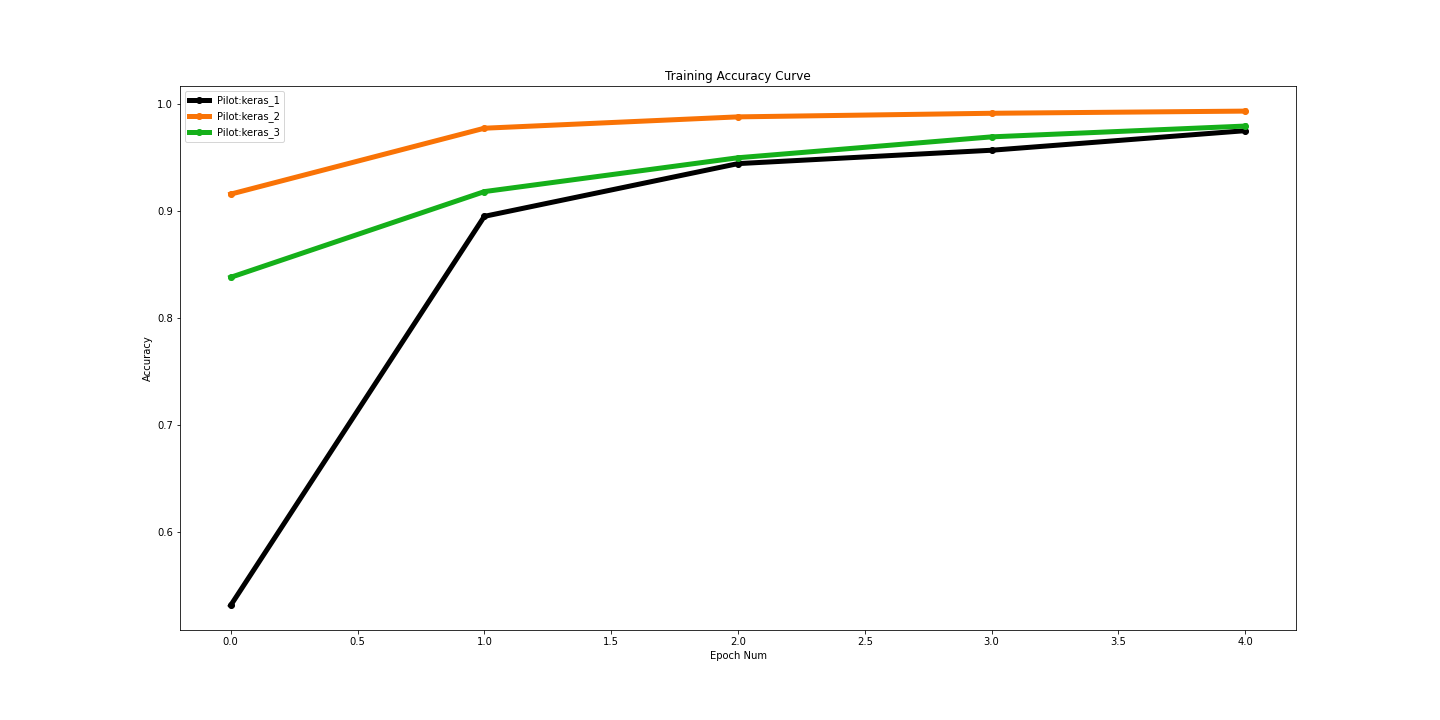

In [ ]:

from IPython.display import Image
Image(filename="workspace/comparison/Comparison/train_accuracy.png")

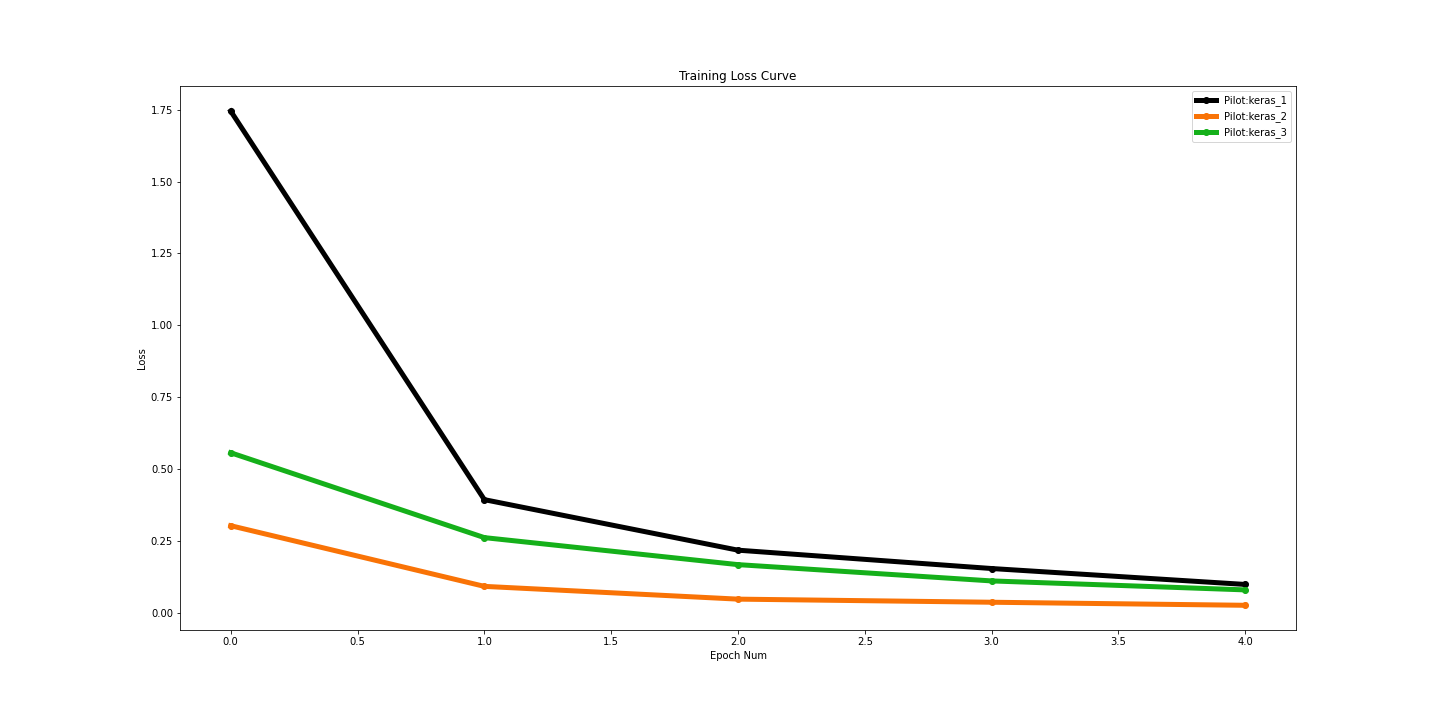

In [ ]:

from IPython.display import Image
Image(filename="workspace/comparison/Comparison/train_loss.png")

In [ ]:
from IPython.display import Image
Image(filename="workspace/comparison/Comparison/val_accuracy.png")

In [ ]:
from IPython.display import Image
Image(filename="workspace/comparison/Comparison/val_loss.png")

we will go with last model for comparison with next model as that includes training with entire dataset.

#Resnet152

In [ ]:
gtf = prototype(verbose=1);
gtf.Prototype("Pilot", "Resnet152");

Mxnet Version: 1.6.0

Experiment Details
    Project: Pilot
    Experiment: Resnet152
    Dir: /content/workspace/Pilot/Resnet152/



In [ ]:
#Setup the model with images in letter2 folder 
gtf.Default(dataset_path="/content/files/letters2", 
            path_to_csv ="/content/files/sanskars2.csv",
            model_name="resnet152_v2", 
            freeze_base_network=False,
            delimiter = ",",
            num_epochs=5);

Dataset Details
    Train path:     /content/files/letters2
    Val path:       None
    CSV train path: /content/files/sanskars2.csv
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   2
    Train-val split:   0.7
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 4158
    Num val images:   1782
    Num classes:      33

Model Params
    Model name:           resnet152_v2
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model



























  0%|          | 0/132431 [00:00<?, ?KB/s]
























  3%|▎         | 3357/132431 [00:00<00:03, 33564.83KB/s]
























  7%|▋         | 8669/132431 [00:00<00:03, 37728.72KB/s]
























 11%|█         | 13981/132431 [00:00<00:02, 41319.02KB/s]
























 15%|█▍        | 19338/132431 [00:00<00:02, 44361.87KB/s]
























 18%|█▊        | 24419/132431 [00:00<00:02, 46109.80KB/s]
























 22%|██▏       | 29525/132431 [00:00<00:02, 47488.45KB/s]
























 26%|██▋       | 34805/132431 [00:00<00:01, 48964.70KB/s]
























 30%|███       | 40097/132431 [00:00<00:01, 50087.36KB/s]
























 34%|███▍      | 45531/132431 [00:00<00:01, 51285.02KB/s]
























 38%|███▊      | 50586/132431 [00:01<00:01, 50174.46KB/s]
























 42%|████▏     | 55558/132431 [00:01<00:01, 48142.09KB/s]
























 46%|███

    Model Loaded on device
        Model name:                           resnet152_v2
        Num of potentially trainable layers:  309
        Num of actual trainable layers:       308

Optimizer
    Name:          sgd
    Learning rate: 0.01
    Params:        {'lr': 0.01, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   steplr
    Params: {'step_size': 1, 'gamma': 0.98, 'last_epoch': -1}

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}

Training params
    Num Epochs: 5

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_



monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [ ]:
#Shuffling data
gtf.update_shuffle_data(True);
gtf.update_batch_size(8);
#learning rate 0.1 and 0.05 were not working well ,lr lesser than that didn't vary much w.r.t almost same val and training loss , so 0.01 best choice  
gtf.update_learning_rate(.01);
#Though optimizers like Adam and its variants are very fast at converging but the problem with them are they sometimes get stuck at local optima's.Mostly this is the case that they didn,t work well here.      
#Whereas famous optimizers linke SGD and SGD plus momentum are slower to converge , but they dont get stuck at local optima easily.
# Here after analysing all these optimizers , sgd worked better.
gtf.optimizer_sgd(0.01);
gtf.Reload();

Update: Data shuffle - True

Update: Batch size - 8

Update: Learning Rate - 0.01

Optimizer
    Name:          sgd
    Learning rate: 0.01
    Params:        {'lr': 0.01, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}





monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 4158
    Num val images:   1782
    Num classes:      33

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet152_v2
        Num of potentially trainable layers:  309
        Num of actual trainable layers:       308



In [ ]:
#Training
gtf.Train();


























  0%|          | 0/520 [00:00<?, ?it/s]

Training Start
    Epoch 1/5
    ----------


Streaming output truncated to the last 5000 lines.






 14%|█▍        | 32/223 [00:06<00:38,  4.98it/s]

























 15%|█▍        | 33/223 [00:06<00:38,  4.96it/s]

























 15%|█▌        | 34/223 [00:06<00:37,  5.01it/s]

























 16%|█▌        | 35/223 [00:06<00:37,  4.97it/s]

























 16%|█▌        | 36/223 [00:07<00:37,  5.00it/s]

























 17%|█▋        | 37/223 [00:07<00:36,  5.04it/s]

























 17%|█▋        | 38/223 [00:07<00:36,  5.05it/s]

























 17%|█▋        | 39/223 [00:07<00:36,  4.99it/s]

























 18%|█▊        | 40/223 [00:07<00:36,  4.99it/s]

























 18%|█▊        | 41/223 [00:08<00:36,  4.99it/s]

























 19%|█▉        | 42/223 [00:08<00:36,  5.02it/s]

























 19%|█▉        | 43/223 [00:08<00:35,  5.06it/s]

























 20%|█▉        | 44/223 [00:08<00:35,  5.07it/s]










    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.519, Train-loss: 1.779 | Val-acc: 0.820988, Val-loss: 0.649, | time: 332.8 sec

    Epoch 2/5
    ----------


Streaming output truncated to the last 5000 lines.














 21%|██        | 46/223 [00:09<00:35,  5.00it/s]



























 21%|██        | 47/223 [00:09<00:35,  4.98it/s]



























 22%|██▏       | 48/223 [00:09<00:35,  4.99it/s]



























 22%|██▏       | 49/223 [00:09<00:34,  5.06it/s]



























 22%|██▏       | 50/223 [00:09<00:34,  4.99it/s]



























 23%|██▎       | 51/223 [00:10<00:34,  5.02it/s]



























 23%|██▎       | 52/223 [00:10<00:34,  5.00it/s]



























 24%|██▍       | 53/223 [00:10<00:34,  5.00it/s]



























 24%|██▍       | 54/223 [00:10<00:33,  5.00it/s]



























 25%|██▍       | 55/223 [00:10<00:34,  4.92it/s]



























 25%|██▌       | 56/223 [00:11<00:33,  5.00it/s]



























 26%|██▌       | 57/223 [00:11<00:33,  4.98it/s]



























 26%|██▌       | 58/223



    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.893, Train-loss: 0.403 | Val-acc: 0.912458, Val-loss: 0.339, | time: 331.6 sec

    Epoch 3/5
    ----------


Streaming output truncated to the last 5000 lines.


















 26%|██▌       | 58/223 [00:11<00:32,  5.05it/s]





























 26%|██▋       | 59/223 [00:11<00:32,  5.08it/s]





























 27%|██▋       | 60/223 [00:11<00:32,  5.02it/s]





























 27%|██▋       | 61/223 [00:12<00:32,  4.99it/s]





























 28%|██▊       | 62/223 [00:12<00:32,  4.98it/s]





























 28%|██▊       | 63/223 [00:12<00:31,  5.03it/s]





























 29%|██▊       | 64/223 [00:12<00:32,  4.97it/s]





























 29%|██▉       | 65/223 [00:12<00:31,  4.95it/s]





























 30%|██▉       | 66/223 [00:13<00:31,  4.96it/s]





























 30%|███       | 67/223 [00:13<00:31,  4.98it/s]





























 30%|███       | 68/223 [00:13<00:31,  4.95it/s]





























 31%|███       | 69/223 [00:13<00:31,  4.95it/s]




























    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.937, Train-loss: 0.240 | Val-acc: 0.925365, Val-loss: 0.296, | time: 331.4 sec

    Epoch 4/5
    ----------


Streaming output truncated to the last 5000 lines.






 30%|███       | 68/223 [00:13<00:31,  4.99it/s]































 31%|███       | 69/223 [00:13<00:31,  4.96it/s]































 31%|███▏      | 70/223 [00:13<00:30,  4.94it/s]































 32%|███▏      | 71/223 [00:14<00:30,  4.98it/s]































 32%|███▏      | 72/223 [00:14<00:29,  5.04it/s]































 33%|███▎      | 73/223 [00:14<00:29,  5.01it/s]































 33%|███▎      | 74/223 [00:14<00:29,  5.02it/s]































 34%|███▎      | 75/223 [00:14<00:29,  5.02it/s]































 34%|███▍      | 76/223 [00:15<00:29,  4.98it/s]































 35%|███▍      | 77/223 [00:15<00:29,  4.95it/s]































 35%|███▍      | 78/223 [00:15<00:29,  4.98it/s]































 35%|███▌      | 79/223 [00:15<00:28,  5.00it/s]


















    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.962, Train-loss: 0.142 | Val-acc: 0.946689, Val-loss: 0.213, | time: 331.2 sec

    Epoch 5/5
    ----------


Streaming output truncated to the last 5000 lines.

 34%|███▍      | 76/223 [00:15<00:29,  4.94it/s]

































 35%|███▍      | 77/223 [00:15<00:29,  4.98it/s]

































 35%|███▍      | 78/223 [00:15<00:29,  4.96it/s]

































 35%|███▌      | 79/223 [00:15<00:28,  4.97it/s]

































 36%|███▌      | 80/223 [00:15<00:28,  4.99it/s]

































 36%|███▋      | 81/223 [00:16<00:28,  4.94it/s]

































 37%|███▋      | 82/223 [00:16<00:28,  4.94it/s]

































 37%|███▋      | 83/223 [00:16<00:28,  4.96it/s]

































 38%|███▊      | 84/223 [00:16<00:28,  4.96it/s]

































 38%|███▊      | 85/223 [00:16<00:27,  4.94it/s]

































 39%|███▊      | 86/223 [00:17<00:27,  4.95it/s]

































 39%|███▉      | 87/223 [00:17<00:27,  4.95it/



    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.975, Train-loss: 0.105 | Val-acc: 0.918631, Val-loss: 0.332, | time: 330.2 sec

    Training completed in: 27m 31s
    Best val Acc:          0.946689

Training End

Training Outputs
    Model Dir:   /content/workspace/Pilot/Resnet152/output/models/
    Log Dir:     /content/workspace/Pilot/Resnet152/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

In [ ]:
#Update the dataset and keep this as another experiment. 
gtf = prototype(verbose=1);
gtf.Prototype("Pilot", "Resnet152_2", 
              copy_from=["Pilot", "Resnet152"]);

gtf.update_dataset(dataset_path="/content/files/letters3",
                   path_to_csv="/content/files/sanskars3.csv");
                   
gtf.Reload();

Mxnet Version: 1.6.0

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 4158
    Num val images:   1782
    Num classes:      33

Model Details
    Loading model - workspace/Pilot/Resnet152/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Pilot
    Experiment: Resnet152_2
    Dir: /content/workspace/Pilot/Resnet152_2/

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 5940
    Num val images:   660


In [40]:
gtf.Train();




































  0%|          | 0/743 [00:00<?, ?it/s]

Training Start
    Epoch 1/5
    ----------


Streaming output truncated to the last 5000 lines.














 92%|█████████▏| 687/743 [06:18<00:30,  1.81it/s]


































 93%|█████████▎| 688/743 [06:18<00:30,  1.82it/s]


































 93%|█████████▎| 689/743 [06:19<00:29,  1.82it/s]


































 93%|█████████▎| 690/743 [06:19<00:29,  1.82it/s]


































 93%|█████████▎| 691/743 [06:20<00:28,  1.81it/s]


































 93%|█████████▎| 692/743 [06:20<00:28,  1.81it/s]


































 93%|█████████▎| 693/743 [06:21<00:27,  1.82it/s]


































 93%|█████████▎| 694/743 [06:22<00:27,  1.81it/s]


































 94%|█████████▎| 695/743 [06:22<00:26,  1.81it/s]


































 94%|█████████▎| 696/743 [06:23<00:26,  1.80it/s]


































 94%|█████████▍| 697/743 [06:23<00:25,  1.80it/s]


































 94%|██████



    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.936, Train-loss: 0.251 | Val-acc: 0.963636, Val-loss: 0.126, | time: 428.8 sec

    Epoch 2/5
    ----------


Streaming output truncated to the last 5000 lines.






























 94%|█████████▎| 695/743 [06:22<00:26,  1.82it/s]




































 94%|█████████▎| 696/743 [06:22<00:25,  1.83it/s]




































 94%|█████████▍| 697/743 [06:23<00:25,  1.82it/s]




































 94%|█████████▍| 698/743 [06:23<00:24,  1.81it/s]




































 94%|█████████▍| 699/743 [06:24<00:24,  1.80it/s]




































 94%|█████████▍| 700/743 [06:24<00:23,  1.81it/s]




































 94%|█████████▍| 701/743 [06:25<00:23,  1.81it/s]




































 94%|█████████▍| 702/743 [06:25<00:22,  1.82it/s]




































 95%|█████████▍| 703/743 [06:26<00:22,  1.82it/s]




































 95%|█████████▍| 704/743 [06:27<00:21,  1.82it/s]




































 95%|█████████▍| 705/743 [06:27<00:20,  1.82it/s]













    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.980, Train-loss: 0.083 | Val-acc: 0.969697, Val-loss: 0.102, | time: 428.2 sec

    Epoch 3/5
    ----------


Streaming output truncated to the last 5000 lines.
 94%|█████████▍| 701/743 [06:25<00:23,  1.82it/s]






































 94%|█████████▍| 702/743 [06:25<00:22,  1.81it/s]






































 95%|█████████▍| 703/743 [06:26<00:22,  1.81it/s]






































 95%|█████████▍| 704/743 [06:27<00:21,  1.81it/s]






































 95%|█████████▍| 705/743 [06:27<00:20,  1.82it/s]






































 95%|█████████▌| 706/743 [06:28<00:20,  1.82it/s]






































 95%|█████████▌| 707/743 [06:28<00:19,  1.82it/s]






































 95%|█████████▌| 708/743 [06:29<00:19,  1.82it/s]






































 95%|█████████▌| 709/743 [06:29<00:18,  1.82it/s]






































 96%|█████████▌| 710/743 [06:30<00:18,  1.82it/s]






































 96%|█████████▌| 711/743 [06:30<00:17,  1.82it/s]























    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.992, Train-loss: 0.039 | Val-acc: 0.987879, Val-loss: 0.068, | time: 428.3 sec

    Epoch 4/5
    ----------


Streaming output truncated to the last 5000 lines.



































 95%|█████████▌| 708/743 [06:30<00:19,  1.81it/s]








































 95%|█████████▌| 709/743 [06:31<00:18,  1.81it/s]








































 96%|█████████▌| 710/743 [06:31<00:18,  1.80it/s]








































 96%|█████████▌| 711/743 [06:32<00:17,  1.81it/s]








































 96%|█████████▌| 712/743 [06:32<00:17,  1.81it/s]








































 96%|█████████▌| 713/743 [06:33<00:16,  1.81it/s]








































 96%|█████████▌| 714/743 [06:33<00:15,  1.81it/s]








































 96%|█████████▌| 715/743 [06:34<00:15,  1.81it/s]








































 96%|█████████▋| 716/743 [06:35<00:14,  1.81it/s]








































 97%|█████████▋| 717/743 [06:35<00:14,  1.81it/s]








































 97%|█████████



    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.991, Train-loss: 0.036 | Val-acc: 0.975758, Val-loss: 0.107, | time: 428.6 sec

    Epoch 5/5
    ----------


Streaming output truncated to the last 5000 lines.














 96%|█████████▌| 712/743 [06:32<00:17,  1.82it/s]










































 96%|█████████▌| 713/743 [06:32<00:16,  1.82it/s]










































 96%|█████████▌| 714/743 [06:33<00:15,  1.82it/s]










































 96%|█████████▌| 715/743 [06:33<00:15,  1.81it/s]










































 96%|█████████▋| 716/743 [06:34<00:14,  1.81it/s]










































 97%|█████████▋| 717/743 [06:34<00:14,  1.81it/s]










































 97%|█████████▋| 718/743 [06:35<00:13,  1.82it/s]










































 97%|█████████▋| 719/743 [06:35<00:13,  1.82it/s]










































 97%|█████████▋| 720/743 [06:36<00:12,  1.82it/s]










































 97%|█████████▋| 721/743 [06:37<00:12,  1.82it/s]










































 97%|█████████▋



    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.997, Train-loss: 0.020 | Val-acc: 0.992424, Val-loss: 0.033, | time: 428.8 sec

    Training completed in: 35m 38s
    Best val Acc:          0.992424

Training End

Training Outputs
    Model Dir:   /content/workspace/Pilot/Resnet152_2/output/models/
    Log Dir:     /content/workspace/Pilot/Resnet152_2/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

In [41]:
gtf = prototype(verbose=1);
gtf.Prototype("Pilot", "Resnet152_3", 
              copy_from=["Pilot", "Resnet152_2"]);

gtf.update_dataset(dataset_path="/content/files/letters",
                   path_to_csv="/content/files/sanskars1.csv");
                   
gtf.Reload();

Mxnet Version: 1.6.0

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 5940
    Num val images:   660
    Num classes:      33

Model Details
    Loading model - workspace/Pilot/Resnet152_2/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Pilot
    Experiment: Resnet152_3
    Dir: /content/workspace/Pilot/Resnet152_3/

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 1485
    Num val images:   165

In [42]:
gtf.Train();














































  0%|          | 0/186 [00:00<?, ?it/s]

Training Start
    Epoch 1/5
    ----------


Streaming output truncated to the last 5000 lines.


























 53%|█████▎    | 98/186 [00:53<00:48,  1.82it/s]












































 53%|█████▎    | 99/186 [00:54<00:47,  1.82it/s]












































 54%|█████▍    | 100/186 [00:55<00:47,  1.82it/s]












































 54%|█████▍    | 101/186 [00:55<00:46,  1.82it/s]












































 55%|█████▍    | 102/186 [00:56<00:46,  1.82it/s]












































 55%|█████▌    | 103/186 [00:56<00:45,  1.82it/s]












































 56%|█████▌    | 104/186 [00:57<00:45,  1.82it/s]












































 56%|█████▋    | 105/186 [00:57<00:44,  1.82it/s]












































 57%|█████▋    | 106/186 [00:58<00:44,  1.80it/s]












































 58%|█████▊    | 107/186 [00:58<00:43,  1.80it/s]

































    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.836, Train-loss: 0.608 | Val-acc: 0.806061, Val-loss: 0.521, | time: 110.1 sec

    Epoch 2/5
    ----------


Streaming output truncated to the last 5000 lines.








 54%|█████▍    | 100/186 [00:54<00:47,  1.81it/s]













































 54%|█████▍    | 101/186 [00:55<00:46,  1.81it/s]













































 55%|█████▍    | 102/186 [00:55<00:46,  1.81it/s]













































 55%|█████▌    | 103/186 [00:56<00:45,  1.81it/s]













































 56%|█████▌    | 104/186 [00:56<00:45,  1.81it/s]













































 56%|█████▋    | 105/186 [00:57<00:44,  1.82it/s]













































 57%|█████▋    | 106/186 [00:57<00:44,  1.81it/s]













































 58%|█████▊    | 107/186 [00:58<00:43,  1.81it/s]













































 58%|█████▊    | 108/186 [00:59<00:43,  1.81it/s]













































 59%|█████▊    | 109/186 [00:59<00:42,  1.80it/s]








































    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.931, Train-loss: 0.265 | Val-acc: 0.884848, Val-loss: 0.437, | time: 109.1 sec

    Epoch 3/5
    ----------


Streaming output truncated to the last 5000 lines.









































 55%|█████▌    | 103/186 [00:56<00:45,  1.81it/s]














































 56%|█████▌    | 104/186 [00:56<00:45,  1.82it/s]














































 56%|█████▋    | 105/186 [00:57<00:44,  1.82it/s]














































 57%|█████▋    | 106/186 [00:58<00:43,  1.82it/s]














































 58%|█████▊    | 107/186 [00:58<00:43,  1.83it/s]














































 58%|█████▊    | 108/186 [00:59<00:43,  1.81it/s]














































 59%|█████▊    | 109/186 [00:59<00:42,  1.81it/s]














































 59%|█████▉    | 110/186 [01:00<00:42,  1.81it/s]














































 60%|█████▉    | 111/186 [01:00<00:41,  1.81it/s]














































 60%|██████    | 112/186 [01:01<00:40,  1.81



    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.952, Train-loss: 0.162 | Val-acc: 0.921212, Val-loss: 0.243, | time: 109.3 sec

    Epoch 4/5
    ----------


Streaming output truncated to the last 5000 lines.



























 58%|█████▊    | 107/186 [00:58<00:43,  1.82it/s]
















































 58%|█████▊    | 108/186 [00:59<00:43,  1.81it/s]
















































 59%|█████▊    | 109/186 [00:59<00:42,  1.81it/s]
















































 59%|█████▉    | 110/186 [01:00<00:41,  1.81it/s]
















































 60%|█████▉    | 111/186 [01:00<00:41,  1.81it/s]
















































 60%|██████    | 112/186 [01:01<00:40,  1.82it/s]
















































 61%|██████    | 113/186 [01:01<00:40,  1.82it/s]
















































 61%|██████▏   | 114/186 [01:02<00:39,  1.81it/s]
















































 62%|██████▏   | 115/186 [01:02<00:39,  1.81it/s]
















































 62%|██████▏   | 116/186 [01:03<00:38,  



    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.973, Train-loss: 0.112 | Val-acc: 0.927273, Val-loss: 0.244, | time: 109.4 sec

    Epoch 5/5
    ----------


Streaming output truncated to the last 5000 lines.































 59%|█████▉    | 110/186 [01:00<00:41,  1.82it/s]


















































 60%|█████▉    | 111/186 [01:00<00:41,  1.81it/s]


















































 60%|██████    | 112/186 [01:01<00:40,  1.82it/s]


















































 61%|██████    | 113/186 [01:01<00:40,  1.82it/s]


















































 61%|██████▏   | 114/186 [01:02<00:39,  1.82it/s]


















































 62%|██████▏   | 115/186 [01:02<00:39,  1.81it/s]


















































 62%|██████▏   | 116/186 [01:03<00:38,  1.82it/s]


















































 63%|██████▎   | 117/186 [01:04<00:37,  1.82it/s]


















































 63%|██████▎   | 118/186 [01:04<00:37,  1.81it/s]


















































 64%|██████▍   | 1



    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.980, Train-loss: 0.076 | Val-acc: 0.921212, Val-loss: 0.277, | time: 108.4 sec

    Training completed in: 9m 0s
    Best val Acc:          0.927273

Training End

Training Outputs
    Model Dir:   /content/workspace/Pilot/Resnet152_3/output/models/
    Log Dir:     /content/workspace/Pilot/Resnet152_3/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

Comparison: - Comparison
Project - Pilot, Experiment - Resnet152 added
Project - Pilot, Experiment - Resnet152_2 added
Project - Pilot, Experiment - Resnet152_3 added
Generating statistics...
Generated



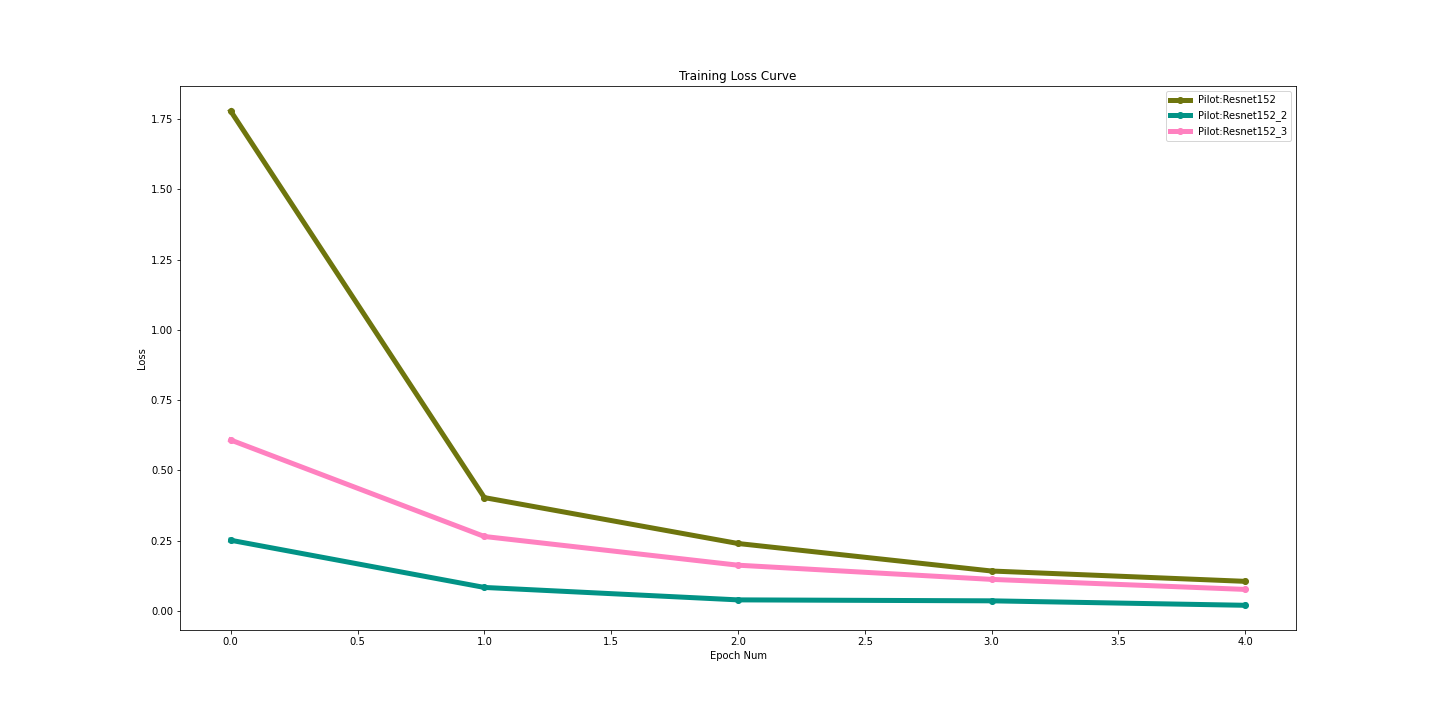

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [43]:
#Visualizing all three resnet152 experiments
from compare_prototype import compare
gtf = compare(verbose=1);
gtf.Comparison("Comparison")

gtf.Add_Experiment("Pilot", "Resnet152");
gtf.Add_Experiment("Pilot", "Resnet152_2");
gtf.Add_Experiment("Pilot", "Resnet152_3");

gtf.Generate_Statistics()

#Training Loss
from IPython.display import Image
Image(filename="workspace/comparison/Comparison/train_loss.png")

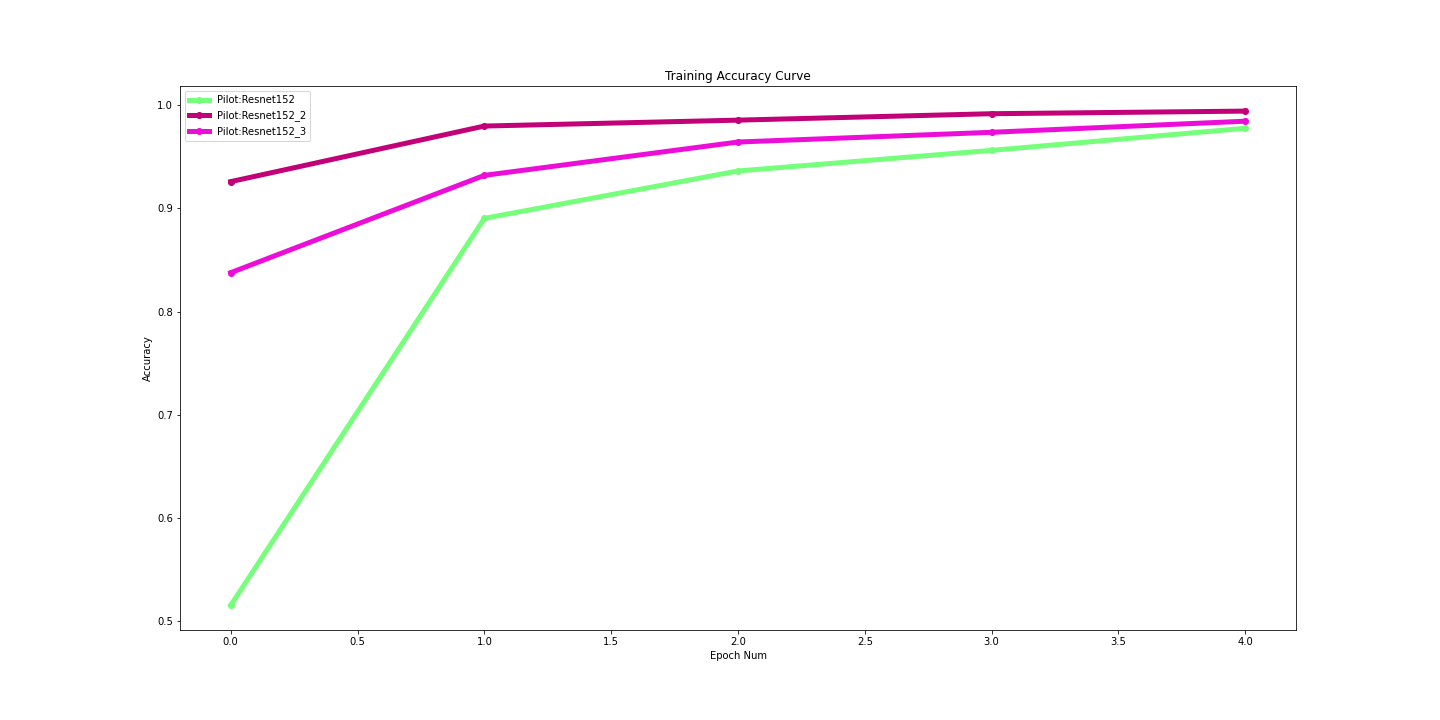

In [ ]:
#Training accuracy
from IPython.display import Image
Image(filename="workspace/comparison/Comparison/train_accuracy.png")

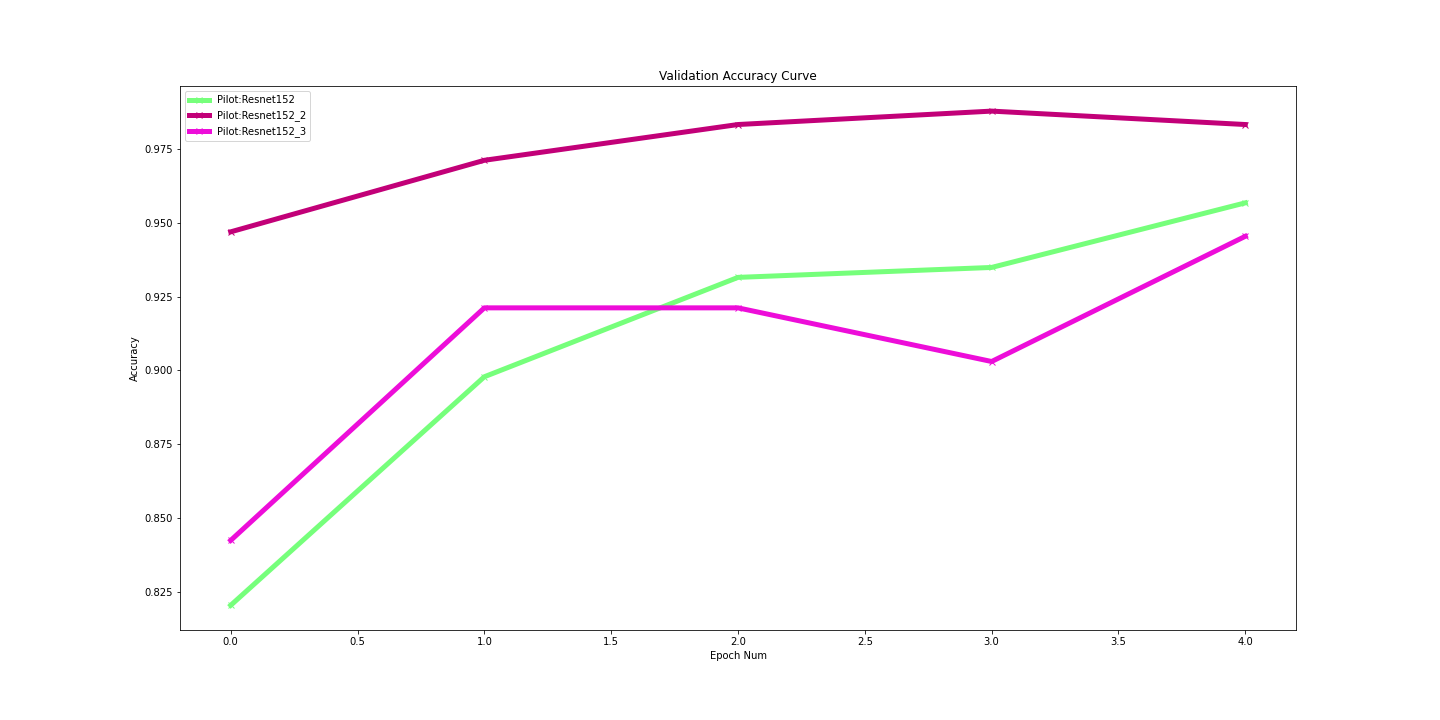

In [ ]:
#Validation Accuracy
from IPython.display import Image
Image(filename="workspace/comparison/Comparison/val_accuracy.png")

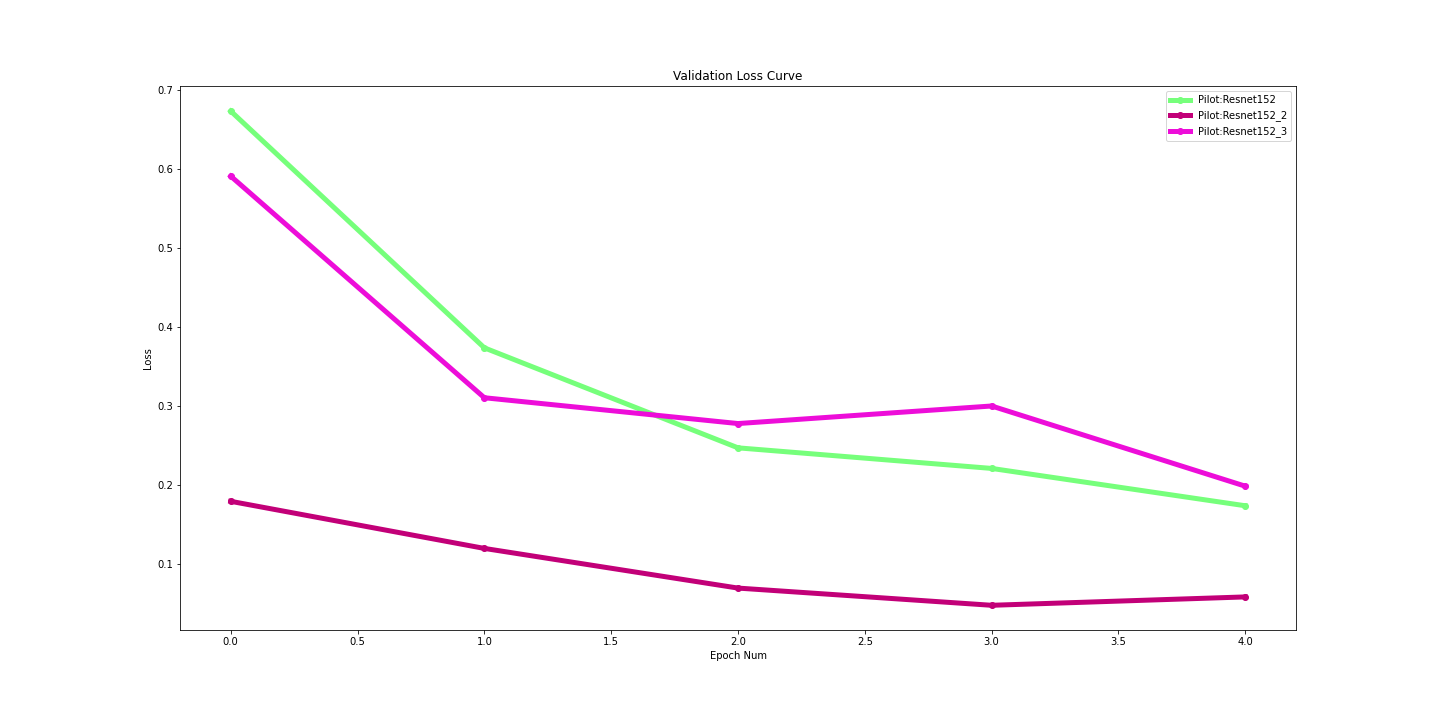

In [ ]:
#Validation Loss
from IPython.display import Image
Image(filename="workspace/comparison/Comparison/val_loss.png")

#DenseNet

In [47]:
#Setup Project Name and Experiment name
gtf = prototype(verbose=1);
gtf.Prototype("Pilot", "Densenet_121");

Mxnet Version: 1.6.0

Experiment Details
    Project: Pilot
    Experiment: Densenet_121
    Dir: /content/workspace/Pilot/Densenet_121/



In [48]:
#Setup the model with densenet
gtf.Default(dataset_path="/content/files/letters2", 
            path_to_csv ="/content/files/sanskars2.csv",
            model_name="densenet121", 
            freeze_base_network=False,
            delimiter = ",",
            num_epochs=5);

Dataset Details
    Train path:     /content/files/letters2
    Val path:       None
    CSV train path: /content/files/sanskars2.csv
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   2
    Train-val split:   0.7
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 4158
    Num val images:   1782
    Num classes:      33

Model Params
    Model name:           densenet121
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model























































  0%|          | 0/29622 [00:00<?, ?KB/s]




















































 14%|█▍        | 4272/29622 [00:00<00:00, 42718.11KB/s]




















































 33%|███▎      | 9639/29622 [00:00<00:00, 45503.43KB/s]




















































 51%|█████     | 15109/29622 [00:00<00:00, 47918.94KB/s]




















































 70%|██████▉   | 20692/29622 [00:00<00:00, 50045.64KB/s]




















































100%|██████████| 29622/29622 [00:00<00:00, 51388.71KB/s]


    Model Loaded on device
        Model name:                           densenet121
        Num of potentially trainable layers:  242
        Num of actual trainable layers:       242

Optimizer
    Name:          sgd
    Learning rate: 0.01
    Params:        {'lr': 0.01, 'momentum': 0, 'weight_decay': 0.0001, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   steplr
    Params: {'step_size': 1, 'gamma': 0.98, 'last_epoch': -1}

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}

Training params
    Num Epochs: 5

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_



monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [49]:
#Finding optimum batch_size
analysis_name = "analyse_batch_sizes"
batch_sizes = [2, 4, 8, 12];
epochs=10
percent_data=15

analysis = gtf.Analyse_Batch_Sizes(analysis_name, batch_sizes, 
                                   percent_data, num_epochs=epochs, state="keep_none");



Running Batch Size analysis
Analysis Name      : analyse_batch_sizes

Running experiment : 1/4
Experiment name    : Batch_Size_2


KeyboardInterrupt: ignored

In [ ]:
#Finding best optimizers
analysis_name = "analyse_optimizers";
optimizers = ["sgd", "adam", "adagrad"];
epochs=10
percent_data=5
analysis = gtf.Analyse_Optimizers(analysis_name, optimizers, 
         percent_data, num_epochs=epochs, state="keep_none");




Running Optimizer analysis
Analysis Name      : analyse_optimizers

Running experiment : 1/3
Experiment name    : Optimizer_sgd


monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


Estimated time     : 4 min
Experiment Complete


Running experiment : 2/3
Experiment name    : Optimizer_adam


monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: amsgrad is active only for keras and pytorch in current version of Monk
  warnings.warn(msg)


Estimated time     : 3 min
Experiment Complete


Running experiment : 3/3
Experiment name    : Optimizer_adagrad


monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: learning_rate_decay is active only for pytorch in current version of Monk
  warnings.warn(msg)


Estimated time     : 3 min
Experiment Complete


Comparing Experiments
Comparison ID:      Comparison_analyse_optimizers
Generated statistics post all epochs
| Experiment Name   |   Train Acc |   Val Acc |   Train Loss |   Val Loss |
|-------------------+-------------+-----------+--------------+------------|
| Optimizer_sgd     |    0.988764 | 0.666667  |     0.157756 |    1.31289 |
| Optimizer_adam    |    0.11985  | 0.0666667 |     3.23875  |    3.62632 |
| Optimizer_adagrad |    0.082397 | 0         |     3.23209  |    3.34847 |



<Figure size 432x288 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [ ]:
#Searching optimum learning rates
analysis_name = "analyse_learning_rates"
lrs = [0.1, 0.05, 0.01, 0.005, 0.0001];
percent_data=15
# Num epochs for each sub-experiment to run
epochs=5
analysis = gtf.Analyse_Learning_Rates(analysis_name, lrs, percent_data, 
                                      num_epochs=epochs, state="keep_none");
#After this , we get the analysis as to which learning rates should be used





Running Learning rate analysis
Analysis Name      : analyse_learning_rates

Running experiment : 1/5
Experiment name    : Learning_Rate_0.1
Estimated time     : 4 min
Experiment Complete


Running experiment : 2/5
Experiment name    : Learning_Rate_0.05
Estimated time     : 4 min
Experiment Complete


Running experiment : 3/5
Experiment name    : Learning_Rate_0.01
Estimated time     : 4 min
Experiment Complete


Running experiment : 4/5
Experiment name    : Learning_Rate_0.005
Estimated time     : 4 min
Experiment Complete


Running experiment : 5/5
Experiment name    : Learning_Rate_0.0001
Estimated time     : 4 min
Experiment Complete


Comparing Experiments
Comparison ID:      Comparison_analyse_learning_rates
Generated statistics post all epochs
| Experiment Name      |   Train Acc |   Val Acc |   Train Loss |   Val Loss |
|----------------------+-------------+-----------+--------------+------------|
| Learning_Rate_0.1    |   0.0411985 | 0.0777778 |     3.71552  |   3.51225  |
|

<Figure size 432x288 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [50]:
#Shuffle the data
gtf.update_shuffle_data(True);
# I have analysed batch size , learning rate and optimizers and tuned them according to validation and training loss.
#For densenets batch size of 2 and 4 did not work well so had to go with 8 , after which validation loss increases 
gtf.update_batch_size(8);
#learning rate 0.1 and 0.05 were not working well ,lr lesser than that didn't vary much w.r.t almost same val and training loss , so 0.01 best choice  
#Though optimizers like Adam and its variants are very fast at converging but the problem with them are they sometimes get stuck at local optima's.Mostly this is the case that they didn,t work well here.      
#Whereas famous optimizers linke SGD and SGD plus momentum are slower to converge , but they dont get stuck at local optima easily.
# Here after analysing all these optimizers , sgd worked better.
#sgd was the best optimizer even for densenets
gtf.optimizer_sgd(0.01);
gtf.Reload();


Update: Data shuffle - True

Update: Batch size - 8

Optimizer
    Name:          sgd
    Learning rate: 0.01
    Params:        {'lr': 0.01, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}





monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 4158
    Num val images:   1782
    Num classes:      33

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           densenet121
        Num of potentially trainable layers:  242
        Num of actual trainable layers:       242



In [ ]:
#Comparing DenseNets for different depth of densenet variants. 
analysis_name = "analyse_models";
models = [["densenet121", False, True], ["densenet161", False, True], ["densenet169", False, True],["densenet201", False, True]];
epochs=10
percent_data=15
analysis = get.Analyse_Models(analysis_name, models, percent_data, num_epochs=epochs, state="keep_none");



Running Model analysis
Analysis Name      : analyse_models

Running experiment : 1/4
Experiment name    : Model_densenet121_unfreeze_base_pretrained
Estimated time     : 7 min
Experiment Complete


Running experiment : 2/4
Experiment name    : Model_densenet161_unfreeze_base_pretrained



100%|██████████| 108160/108160 [00:02<00:00, 42217.96KB/s]


Estimated time     : 13 min
Experiment Complete


Running experiment : 3/4
Experiment name    : Model_densenet169_unfreeze_base_pretrained



100%|██████████| 52816/52816 [00:01<00:00, 28497.67KB/s]


Estimated time     : 9 min
Experiment Complete


Running experiment : 4/4
Experiment name    : Model_densenet201_unfreeze_base_pretrained



 91%|█████████ | 68252/74803 [00:01<00:00, 41782.68KB/s]
74804KB [00:01, 39464.43KB/s]                           


Estimated time     : 11 min
Experiment Complete


Comparing Experiments
Comparison ID:      Comparison_analyse_models
Generated statistics post all epochs
| Experiment Name                            |   Train Acc |   Val Acc |   Train Loss |   Val Loss |
|--------------------------------------------+-------------+-----------+--------------+------------|
| Model_densenet121_unfreeze_base_pretrained |    0.995006 |  0.955556 |    0.0905587 |   0.286816 |
| Model_densenet161_unfreeze_base_pretrained |    0.995006 |  0.955556 |    0.0821387 |   0.335509 |
| Model_densenet169_unfreeze_base_pretrained |    0.991261 |  0.888889 |    0.0970218 |   0.454254 |
| Model_densenet201_unfreeze_base_pretrained |    0.992509 |  0.888889 |    0.0879718 |   0.4154   |



<Figure size 432x288 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

Densenets_121 layers performs better than other higher density densenet.
Although none of them underperforms , which shows that we dont have the any other problem like gradient explosion with higher dense layers.
Still we will use densenets_121 as it will take lesser space and time  

In [51]:
#Train
gtf.Train();






















































  0%|          | 0/520 [00:00<?, ?it/s]

Training Start
    Epoch 1/5
    ----------


Streaming output truncated to the last 5000 lines.






























 59%|█████▉    | 132/223 [00:16<00:11,  8.08it/s]





















































 60%|█████▉    | 133/223 [00:16<00:11,  8.02it/s]





















































 60%|██████    | 134/223 [00:16<00:10,  8.10it/s]





















































 61%|██████    | 135/223 [00:16<00:10,  8.20it/s]





















































 61%|██████    | 136/223 [00:16<00:10,  8.13it/s]





















































 61%|██████▏   | 137/223 [00:16<00:10,  8.24it/s]





















































 62%|██████▏   | 138/223 [00:17<00:10,  8.14it/s]





















































 62%|██████▏   | 139/223 [00:17<00:10,  8.17it/s]





















































 63%|██████▎   | 140/223 [00:17<00:10,  8.17it/s]

















































    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.638, Train-loss: 1.364 | Val-acc: 0.897306, Val-loss: 0.424, | time: 183.8 sec

    Epoch 2/5
    ----------


Streaming output truncated to the last 5000 lines.














 61%|██████    | 135/223 [00:16<00:10,  8.17it/s]























































 61%|██████    | 136/223 [00:16<00:10,  8.05it/s]























































 61%|██████▏   | 137/223 [00:16<00:10,  8.09it/s]























































 62%|██████▏   | 138/223 [00:16<00:10,  8.02it/s]























































 62%|██████▏   | 139/223 [00:16<00:10,  8.18it/s]























































 63%|██████▎   | 140/223 [00:17<00:10,  8.24it/s]























































 63%|██████▎   | 141/223 [00:17<00:10,  8.18it/s]























































 64%|██████▎   | 142/223 [00:17<00:09,  8.18it/s]























































 64%|██████▍   | 143/223 [00:17<00:09,  8.24it/s]

















































    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.923, Train-loss: 0.296 | Val-acc: 0.935466, Val-loss: 0.261, | time: 182.4 sec

    Epoch 3/5
    ----------


Streaming output truncated to the last 5000 lines.










 62%|██████▏   | 138/223 [00:17<00:10,  8.07it/s]

























































 62%|██████▏   | 139/223 [00:17<00:10,  8.21it/s]

























































 63%|██████▎   | 140/223 [00:17<00:10,  8.11it/s]

























































 63%|██████▎   | 141/223 [00:17<00:10,  8.19it/s]

























































 64%|██████▎   | 142/223 [00:17<00:09,  8.28it/s]

























































 64%|██████▍   | 143/223 [00:17<00:09,  8.37it/s]

























































 65%|██████▍   | 144/223 [00:18<00:09,  8.32it/s]

























































 65%|██████▌   | 145/223 [00:18<00:09,  8.10it/s]

























































 65%|██████▌   | 146/223 [00:18<00:09,  8.19it/s]





































    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.955, Train-loss: 0.174 | Val-acc: 0.930976, Val-loss: 0.253, | time: 182.8 sec

    Epoch 4/5
    ----------


Streaming output truncated to the last 5000 lines.


















 63%|██████▎   | 141/223 [00:17<00:10,  8.03it/s]



























































 64%|██████▎   | 142/223 [00:17<00:10,  8.06it/s]



























































 64%|██████▍   | 143/223 [00:17<00:10,  8.00it/s]



























































 65%|██████▍   | 144/223 [00:17<00:09,  8.06it/s]



























































 65%|██████▌   | 145/223 [00:17<00:09,  8.10it/s]



























































 65%|██████▌   | 146/223 [00:18<00:09,  8.10it/s]



























































 66%|██████▌   | 147/223 [00:18<00:09,  7.92it/s]



























































 66%|██████▋   | 148/223 [00:18<00:09,  7.96it/s]



























































 67%|██████▋   | 149/223 [00:18<00:09,  8.17it/s]













    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.970, Train-loss: 0.114 | Val-acc: 0.952862, Val-loss: 0.188, | time: 183.6 sec

    Epoch 5/5
    ----------


Streaming output truncated to the last 5000 lines.







































 64%|██████▍   | 143/223 [00:17<00:09,  8.05it/s]





























































 65%|██████▍   | 144/223 [00:17<00:09,  8.16it/s]





























































 65%|██████▌   | 145/223 [00:17<00:09,  8.19it/s]





























































 65%|██████▌   | 146/223 [00:18<00:09,  8.20it/s]





























































 66%|██████▌   | 147/223 [00:18<00:09,  8.18it/s]





























































 66%|██████▋   | 148/223 [00:18<00:09,  7.95it/s]





























































 67%|██████▋   | 149/223 [00:18<00:09,  7.99it/s]





























































 67%|██████▋   | 150/223 [00:18<00:09,  7.99it/s]





























































 68%|██████▊   | 151/2



    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.984, Train-loss: 0.080 | Val-acc: 0.954545, Val-loss: 0.167, | time: 183.3 sec

    Training completed in: 15m 13s
    Best val Acc:          0.954545

Training End

Training Outputs
    Model Dir:   /content/workspace/Pilot/Densenet_121/output/models/
    Log Dir:     /content/workspace/Pilot/Densenet_121/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

In [52]:
#Updating new dataset to last experiment  
gtf = prototype(verbose=1);
gtf.Prototype("Pilot", "Densenet_121_2", 
              copy_from=["Pilot", "Densenet_121"]);
gtf.update_dataset(dataset_path="/content/files/letters",
                   path_to_csv="/content/files/sanskars1.csv");
gtf.Reload();

Mxnet Version: 1.6.0

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 4158
    Num val images:   1782
    Num classes:      33

Model Details
    Loading model - workspace/Pilot/Densenet_121/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Pilot
    Experiment: Densenet_121_2
    Dir: /content/workspace/Pilot/Densenet_121_2/

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 1485
    Num val image

In [53]:
#Continue Training
gtf.Train();
































































  0%|          | 0/186 [00:00<?, ?it/s]

Training Start
    Epoch 1/5
    ----------


Streaming output truncated to the last 5000 lines.






























































 70%|██████▉   | 130/186 [00:38<00:16,  3.36it/s]






























































 70%|███████   | 131/186 [00:38<00:16,  3.37it/s]






























































 71%|███████   | 132/186 [00:39<00:15,  3.39it/s]






























































 72%|███████▏  | 133/186 [00:39<00:15,  3.38it/s]






























































 72%|███████▏  | 134/186 [00:39<00:15,  3.40it/s]






























































 73%|███████▎  | 135/186 [00:40<00:15,  3.39it/s]






























































 73%|███████▎  | 136/186 [00:40<00:14,  3.36it/s]






























































 74%|███████▎  | 137/186 [00:40<00:14,  3.34it/s]

























































    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.788, Train-loss: 0.705 | Val-acc: 0.836364, Val-loss: 0.486, | time: 59.2 sec

    Epoch 2/5
    ----------


Streaming output truncated to the last 5000 lines.
















































 70%|███████   | 131/186 [00:38<00:16,  3.34it/s]































































 71%|███████   | 132/186 [00:39<00:16,  3.34it/s]































































 72%|███████▏  | 133/186 [00:39<00:15,  3.35it/s]































































 72%|███████▏  | 134/186 [00:39<00:15,  3.36it/s]































































 73%|███████▎  | 135/186 [00:39<00:15,  3.37it/s]































































 73%|███████▎  | 136/186 [00:40<00:14,  3.37it/s]































































 74%|███████▎  | 137/186 [00:40<00:14,  3.37it/s]































































 74%|███████▍  | 138/186 [00:40<00:14,  3.36it/s]
































































    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.911, Train-loss: 0.328 | Val-acc: 0.878788, Val-loss: 0.415, | time: 59.0 sec

    Epoch 3/5
    ----------


Streaming output truncated to the last 5000 lines.




































 71%|███████   | 132/186 [00:38<00:16,  3.35it/s]
































































 72%|███████▏  | 133/186 [00:39<00:15,  3.37it/s]
































































 72%|███████▏  | 134/186 [00:39<00:15,  3.38it/s]
































































 73%|███████▎  | 135/186 [00:39<00:15,  3.37it/s]
































































 73%|███████▎  | 136/186 [00:40<00:14,  3.38it/s]
































































 74%|███████▎  | 137/186 [00:40<00:14,  3.36it/s]
































































 74%|███████▍  | 138/186 [00:40<00:14,  3.33it/s]
































































 75%|███████▍  | 139/186 [00:41<00:14,  3.35it/s]
































































 



    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.964, Train-loss: 0.170 | Val-acc: 0.848485, Val-loss: 0.394, | time: 58.7 sec

    Epoch 4/5
    ----------


Streaming output truncated to the last 5000 lines.


















 72%|███████▏  | 134/186 [00:39<00:15,  3.38it/s]


































































 73%|███████▎  | 135/186 [00:39<00:15,  3.38it/s]


































































 73%|███████▎  | 136/186 [00:40<00:14,  3.38it/s]


































































 74%|███████▎  | 137/186 [00:40<00:14,  3.37it/s]


































































 74%|███████▍  | 138/186 [00:40<00:14,  3.35it/s]


































































 75%|███████▍  | 139/186 [00:41<00:13,  3.37it/s]


































































 75%|███████▌  | 140/186 [00:41<00:13,  3.35it/s]


































































 76%|███████▌  | 141/186 [00:41<00:13,  3.34it/s]


































































 76



    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.970, Train-loss: 0.118 | Val-acc: 0.890909, Val-loss: 0.347, | time: 58.8 sec

    Epoch 5/5
    ----------


Streaming output truncated to the last 5000 lines.









 73%|███████▎  | 135/186 [00:39<00:15,  3.34it/s]




































































 73%|███████▎  | 136/186 [00:40<00:14,  3.34it/s]




































































 74%|███████▎  | 137/186 [00:40<00:14,  3.34it/s]




































































 74%|███████▍  | 138/186 [00:40<00:14,  3.35it/s]




































































 75%|███████▍  | 139/186 [00:41<00:13,  3.36it/s]




































































 75%|███████▌  | 140/186 [00:41<00:13,  3.38it/s]




































































 76%|███████▌  | 141/186 [00:41<00:13,  3.41it/s]




































































 76%|███████▋  | 142/186 [00:41<00:12,  3.41it/s]




































































    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.975, Train-loss: 0.099 | Val-acc: 0.909091, Val-loss: 0.358, | time: 58.9 sec

    Training completed in: 4m 51s
    Best val Acc:          0.909091

Training End

Training Outputs
    Model Dir:   /content/workspace/Pilot/Densenet_121_2/output/models/
    Log Dir:     /content/workspace/Pilot/Densenet_121_2/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

In [54]:
#Updating additional dataset
gtf = prototype(verbose=1);
gtf.Prototype("Pilot", "Densenet_121_3", 
              copy_from=["Pilot", "Densenet_121_2"]);
gtf.update_dataset(dataset_path="/content/files/letters3",
                   path_to_csv="/content/files/sanskars3.csv");
gtf.Reload();

Mxnet Version: 1.6.0

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 1485
    Num val images:   165
    Num classes:      33

Model Details
    Loading model - workspace/Pilot/Densenet_121_2/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Pilot
    Experiment: Densenet_121_3
    Dir: /content/workspace/Pilot/Densenet_121_3/

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 5940
    Num val imag

In [55]:
gtf.Train();







































































  0%|          | 0/743 [00:00<?, ?it/s]

Training Start
    Epoch 1/5
    ----------


Streaming output truncated to the last 5000 lines.




























 17%|█▋        | 14/83 [00:01<00:08,  8.18it/s]






































































 18%|█▊        | 15/83 [00:01<00:08,  8.27it/s]






































































 19%|█▉        | 16/83 [00:01<00:08,  8.13it/s]






































































 20%|██        | 17/83 [00:02<00:08,  8.20it/s]






































































 22%|██▏       | 18/83 [00:02<00:07,  8.16it/s]






































































 23%|██▎       | 19/83 [00:02<00:07,  8.14it/s]






































































 24%|██▍       | 20/83 [00:02<00:07,  8.33it/s]






































































 25%|██▌       | 21/83 [00:02<00:07,  8.23it/s]



















































    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.940, Train-loss: 0.205 | Val-acc: 0.972727, Val-loss: 0.111, | time: 232.6 sec

    Epoch 2/5
    ----------


Streaming output truncated to the last 5000 lines.


































 19%|█▉        | 16/83 [00:01<00:08,  7.96it/s]








































































 20%|██        | 17/83 [00:02<00:08,  7.97it/s]








































































 22%|██▏       | 18/83 [00:02<00:08,  8.02it/s]








































































 23%|██▎       | 19/83 [00:02<00:07,  8.15it/s]








































































 24%|██▍       | 20/83 [00:02<00:07,  8.09it/s]








































































 25%|██▌       | 21/83 [00:02<00:07,  8.02it/s]








































































 27%|██▋       | 22/83 [00:02<00:07,  8.14it/s]








































































 28%|██▊       | 23/83 [00:02<00:07,  7.97it/s]































    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.983, Train-loss: 0.064 | Val-acc: 0.978788, Val-loss: 0.083, | time: 232.2 sec

    Epoch 3/5
    ----------


Streaming output truncated to the last 5000 lines.
















































 22%|██▏       | 18/83 [00:02<00:08,  8.02it/s]










































































 23%|██▎       | 19/83 [00:02<00:07,  8.02it/s]










































































 24%|██▍       | 20/83 [00:02<00:07,  8.01it/s]










































































 25%|██▌       | 21/83 [00:02<00:07,  8.16it/s]










































































 27%|██▋       | 22/83 [00:02<00:07,  7.96it/s]










































































 28%|██▊       | 23/83 [00:02<00:07,  8.12it/s]










































































 29%|██▉       | 24/83 [00:02<00:07,  7.98it/s]










































































 30%|███       | 25/83 [00:03<00:07,  7.96it/s]



    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.991, Train-loss: 0.036 | Val-acc: 0.987879, Val-loss: 0.055, | time: 232.1 sec

    Epoch 4/5
    ----------


Streaming output truncated to the last 5000 lines.






































































 24%|██▍       | 20/83 [00:02<00:07,  7.94it/s]












































































 25%|██▌       | 21/83 [00:02<00:07,  7.94it/s]












































































 27%|██▋       | 22/83 [00:02<00:07,  7.99it/s]












































































 28%|██▊       | 23/83 [00:02<00:07,  7.95it/s]












































































 29%|██▉       | 24/83 [00:02<00:07,  8.06it/s]












































































 30%|███       | 25/83 [00:03<00:07,  8.10it/s]












































































 31%|███▏      | 26/83 [00:03<00:06,  8.18it/s]












































































 33%|███▎  



    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.997, Train-loss: 0.017 | Val-acc: 0.989394, Val-loss: 0.044, | time: 232.3 sec

    Epoch 5/5
    ----------


Streaming output truncated to the last 5000 lines.






















 24%|██▍       | 20/83 [00:02<00:07,  7.92it/s]














































































 25%|██▌       | 21/83 [00:02<00:07,  8.05it/s]














































































 27%|██▋       | 22/83 [00:02<00:07,  8.02it/s]














































































 28%|██▊       | 23/83 [00:02<00:07,  7.96it/s]














































































 29%|██▉       | 24/83 [00:02<00:07,  7.92it/s]














































































 30%|███       | 25/83 [00:03<00:07,  7.95it/s]














































































 31%|███▏      | 26/83 [00:03<00:07,  7.97it/s]














































































 33%|███▎      | 27/83 [00:03<00:07,  7.97it/



    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.997, Train-loss: 0.016 | Val-acc: 0.990909, Val-loss: 0.040, | time: 232.5 sec

    Training completed in: 19m 20s
    Best val Acc:          0.990909

Training End

Training Outputs
    Model Dir:   /content/workspace/Pilot/Densenet_121_3/output/models/
    Log Dir:     /content/workspace/Pilot/Densenet_121_3/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

Comparison: - Statistics
Project - Pilot, Experiment - Densenet_121 added
Project - Pilot, Experiment - Densenet_121_2 added
Project - Pilot, Experiment - Densenet_121_3 added
Generating statistics...
Generated



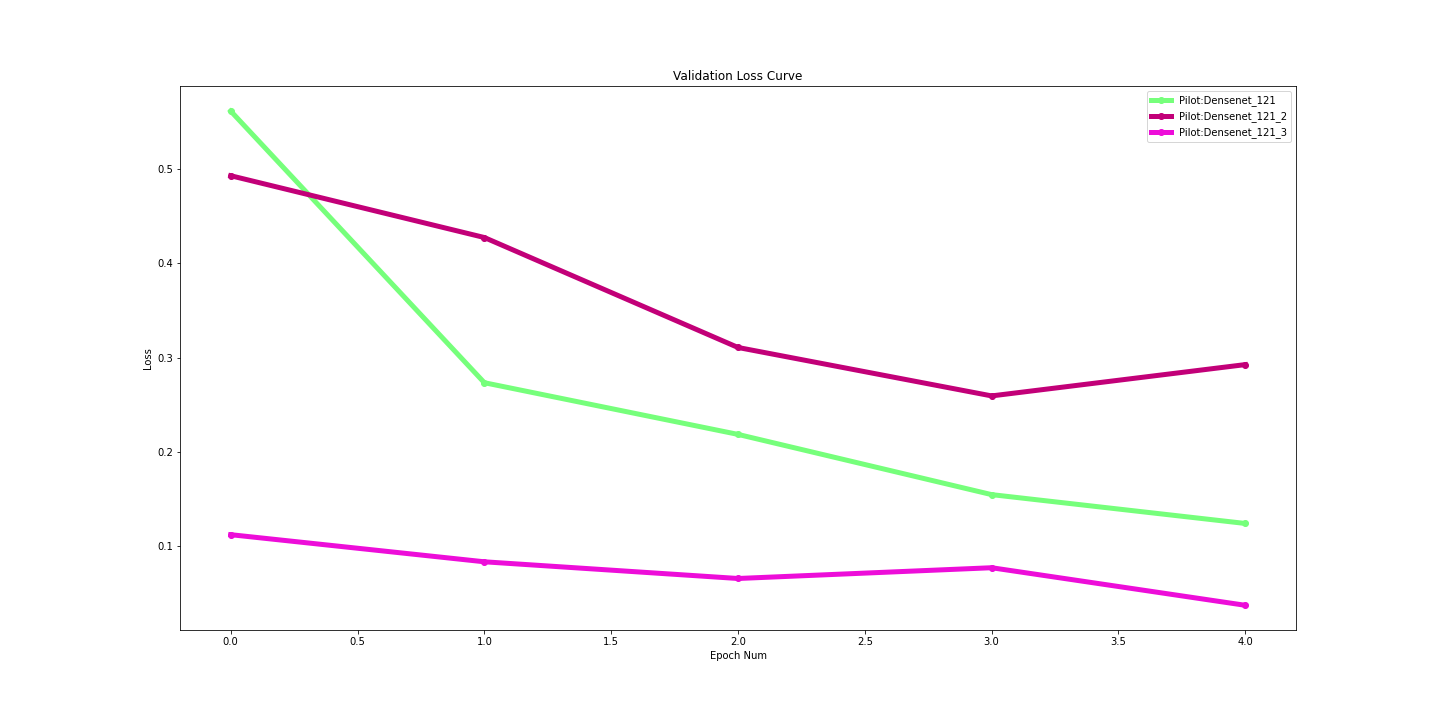

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [ ]:
from compare_prototype import compare
gtf = compare(verbose=1);
gtf.Comparison("Statistics");
os.listdir("workspace/comparison/Statistics")
gtf.Add_Experiment("Pilot", "Densenet_121");
gtf.Add_Experiment("Pilot", "Densenet_121_2");
gtf.Add_Experiment("Pilot", "Densenet_121_3");

gtf.Generate_Statistics();

from IPython.display import Image

Image(filename="workspace/comparison/Statistics/val_loss.png")


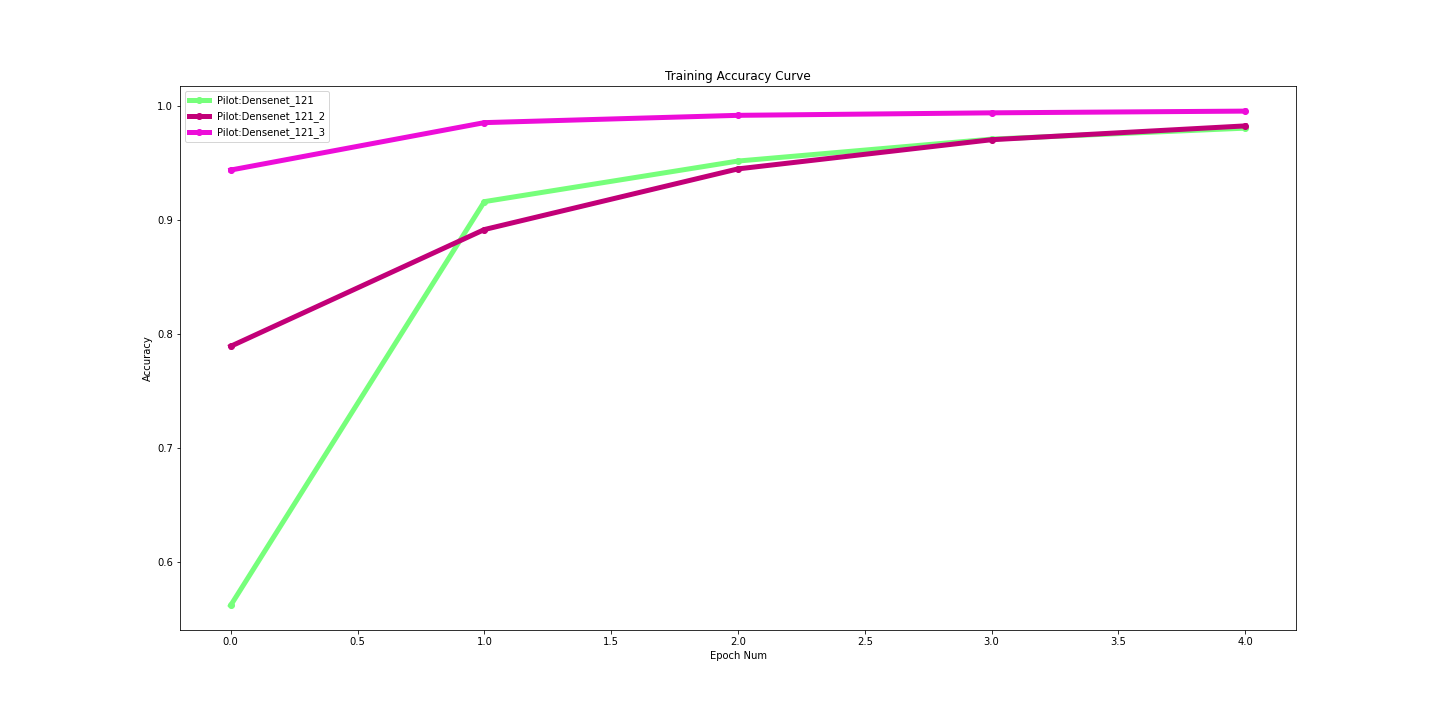

In [ ]:
Image(filename="workspace/comparison/Statistics/train_accuracy.png")


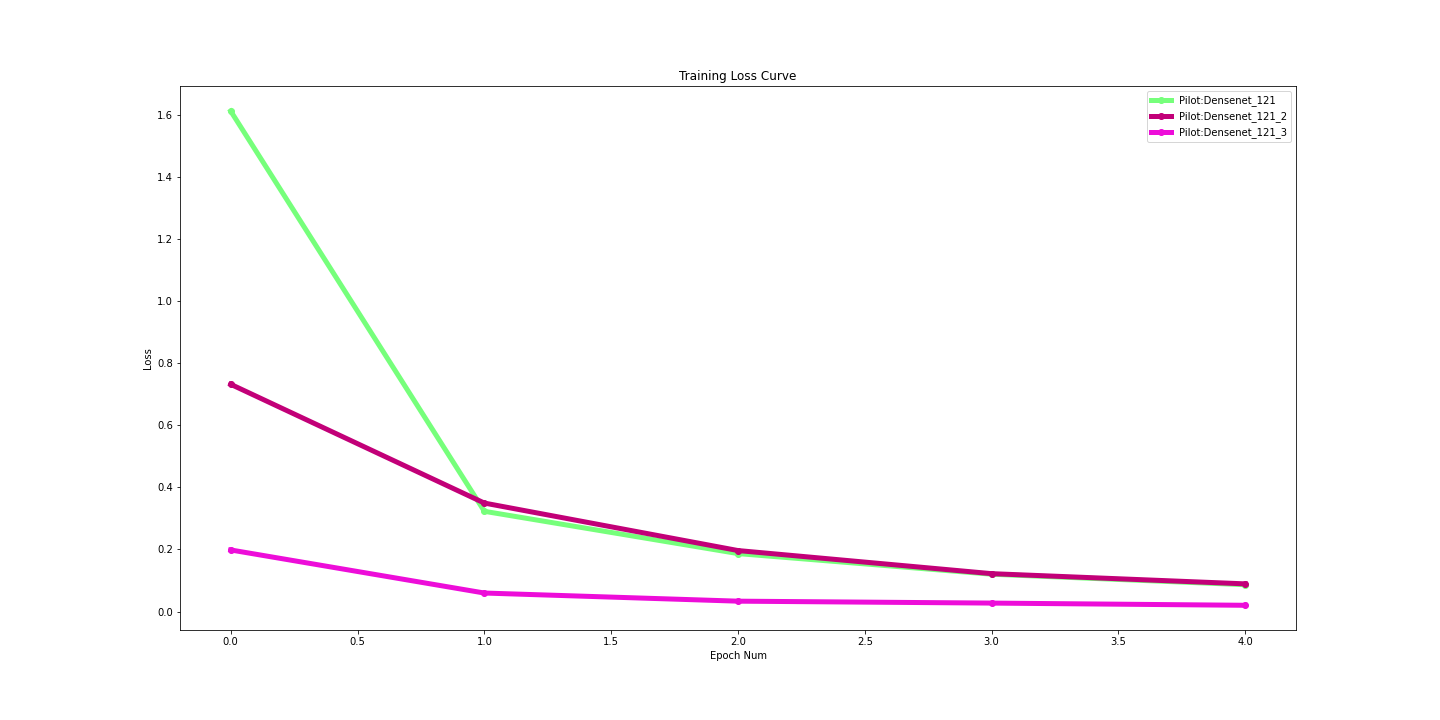

In [ ]:
Image(filename="workspace/comparison/Statistics/train_loss.png")


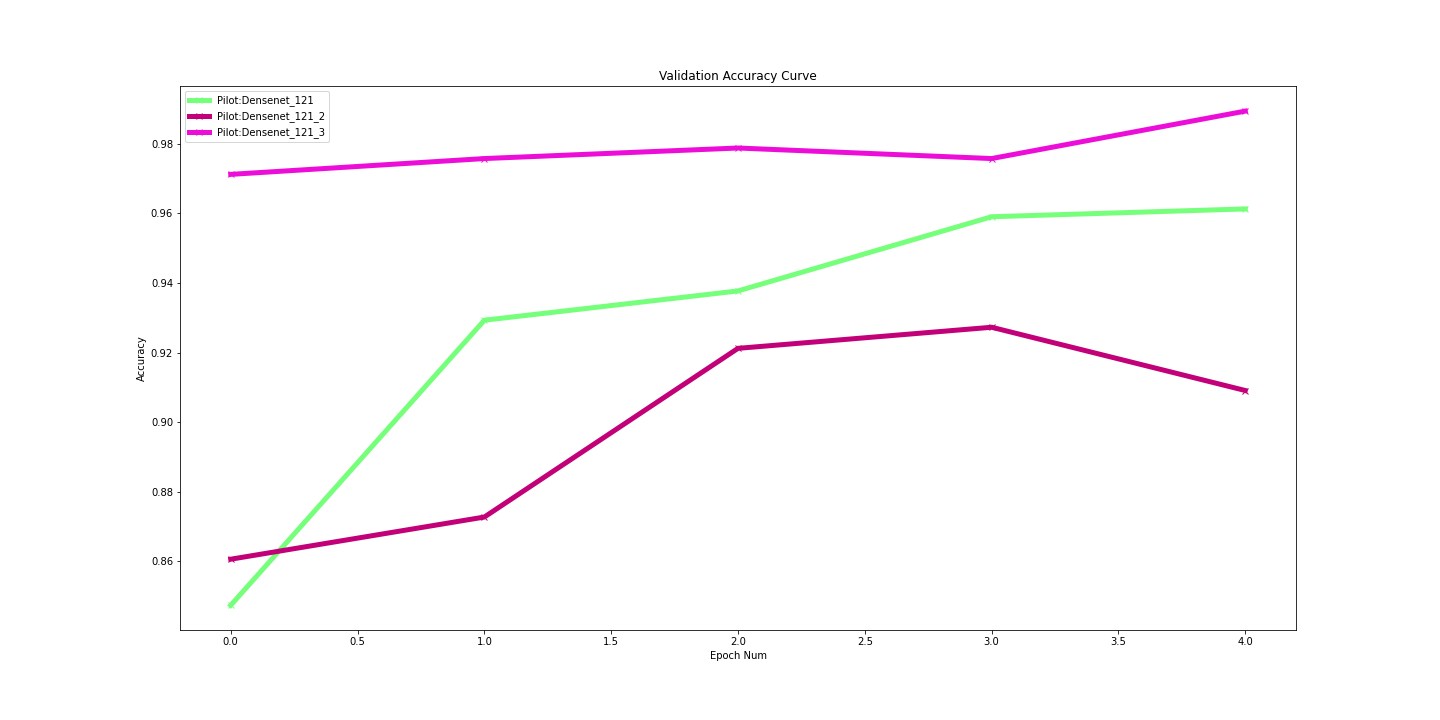

In [ ]:
Image(filename="workspace/comparison/Statistics/val_accuracy.png")

In [ ]:
get = prototype(verbose=1)
get.Prototype("Pilot", "Densenet_121_3", eval_infer=True);

Mxnet Version: 1.6.0

Model Details
    Loading model - workspace/Pilot/Densenet_121_3/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Pilot
    Experiment: Densenet_121_3
    Dir: /content/workspace/Pilot/Densenet_121_3/



In [ ]:
prediction = get.Infer(img_name="/content/files/letters/01_17.png",return_raw=True)

Prediction
    Image name:         /content/files/letters/01_17.png
    Predicted class:      1
    Predicted score:      0.9997320771217346



In [ ]:
prediction = get.Infer(img_name="/content/files/letters2/21_79.png",return_raw=True)

Prediction
    Image name:         /content/files/letters2/21_79.png
    Predicted class:      21
    Predicted score:      0.9990048408508301



In [ ]:
prediction = get.Infer(img_name="/content/files/letters3/33_412.png",return_raw=True)

Prediction
    Image name:         /content/files/letters3/33_412.png
    Predicted class:      33
    Predicted score:      0.9999465942382812



#Final Comparison

In [56]:
from compare_prototype import compare
gtf = compare(verbose=1);
gtf.Comparison("Compare");

Comparison: - Compare


Comparison: - Statistics
Project - Pilot, Experiment - Resnet_2 added
Project - Pilot, Experiment - Resnet152_3 added
Project - Pilot, Experiment - Densenet_121_3 added
Generating statistics...
Generated



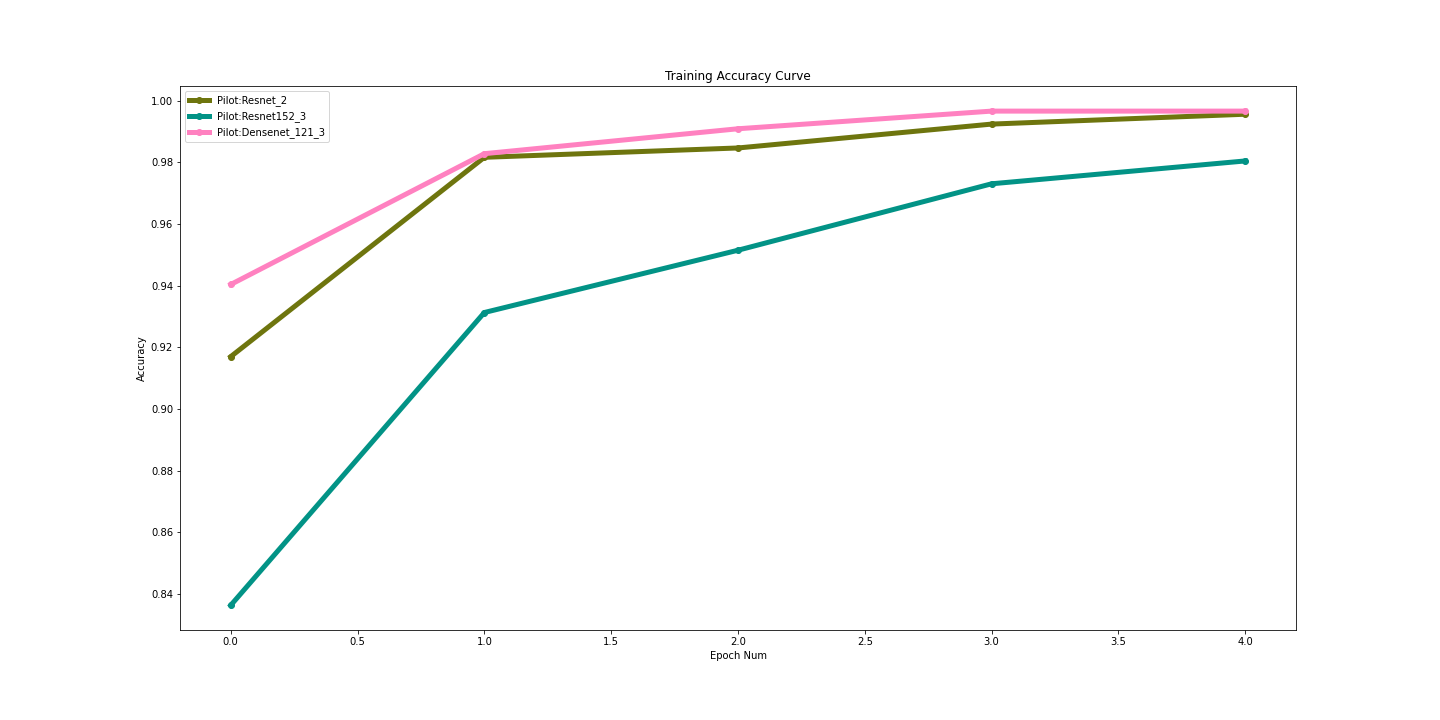

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [59]:
from compare_prototype import compare
gtf = compare(verbose=1);
gtf.Comparison("Statistics");
os.listdir("workspace/comparison/Statistics")

gtf.Add_Experiment("Pilot", "Resnet_2");
gtf.Add_Experiment("Pilot", "Resnet152_3");
gtf.Add_Experiment("Pilot", "Densenet_121_3");

gtf.Generate_Statistics();

from IPython.display import Image
Image(filename="workspace/comparison/Statistics/train_accuracy.png")





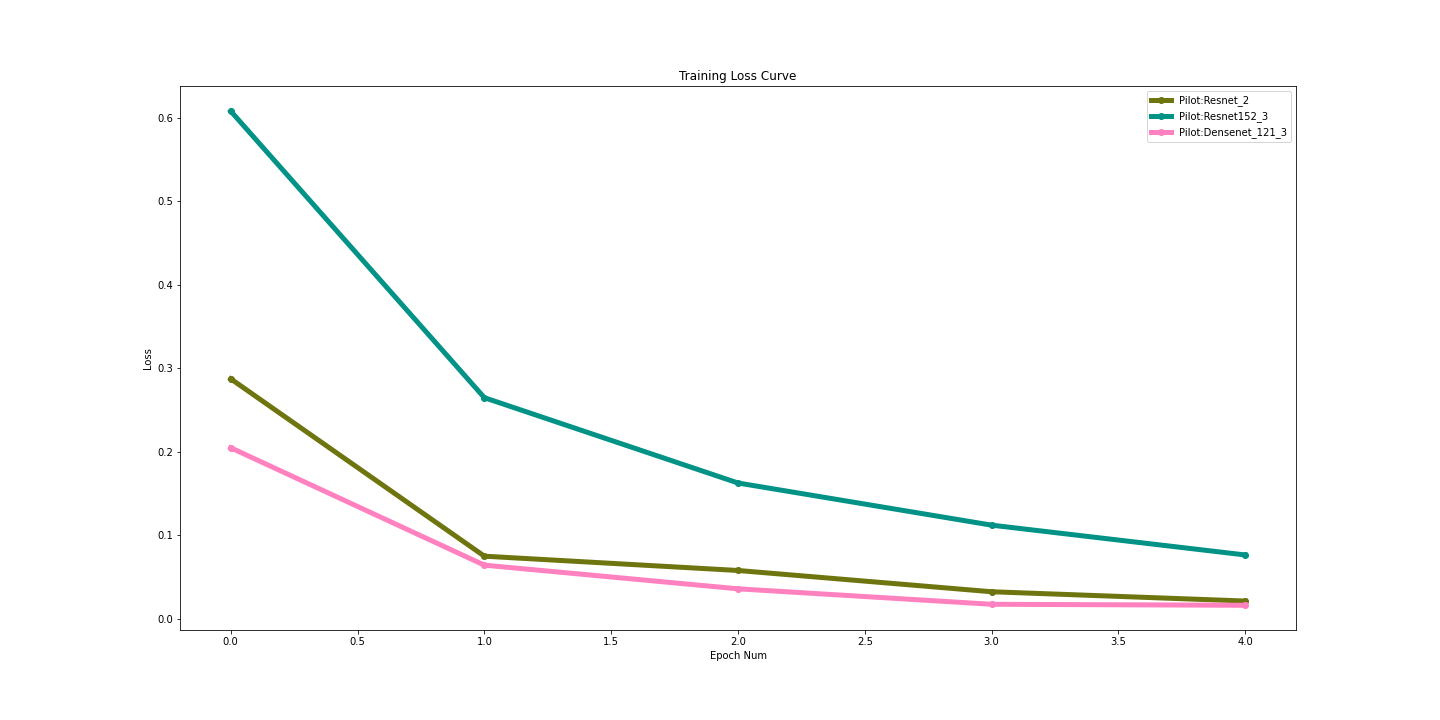

In [60]:
from IPython.display import Image

Image(filename="workspace/comparison/Statistics/train_loss.png")

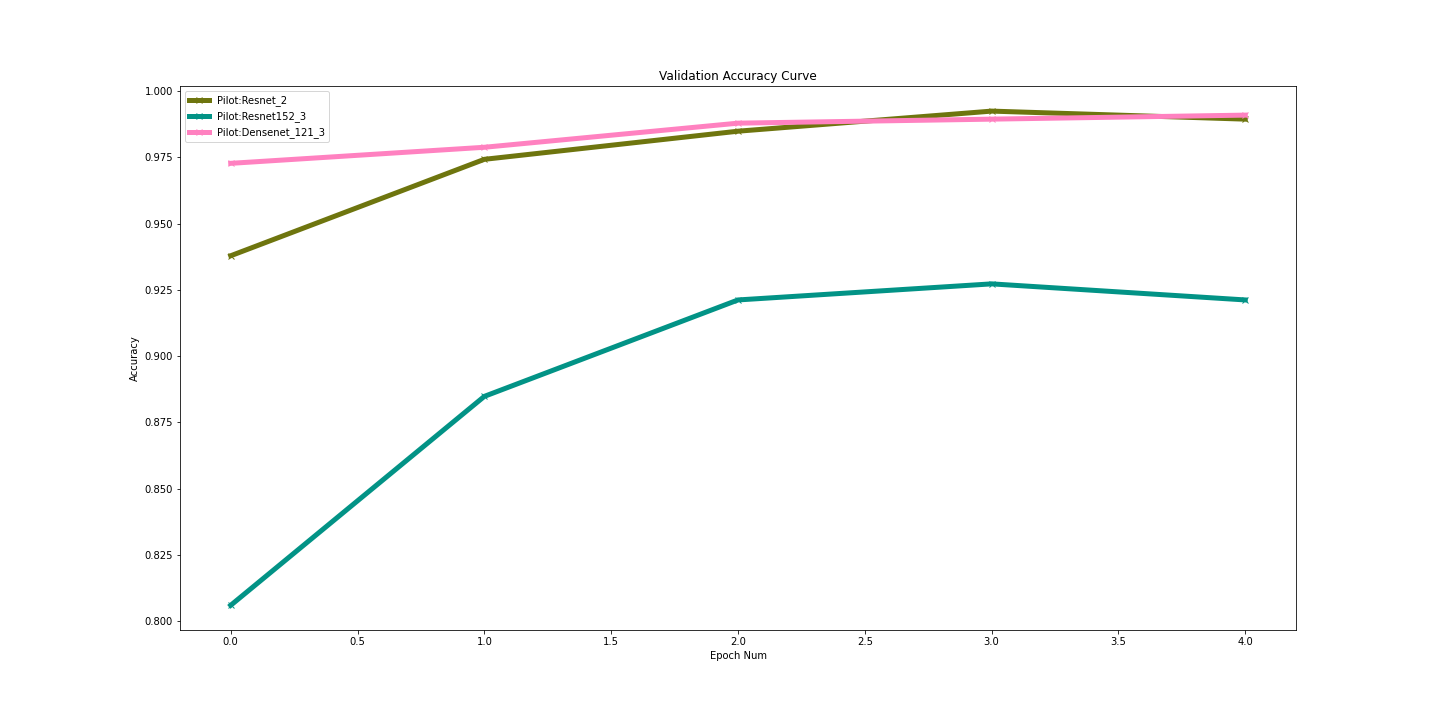

In [61]:
Image(filename="workspace/comparison/Statistics/val_accuracy.png")

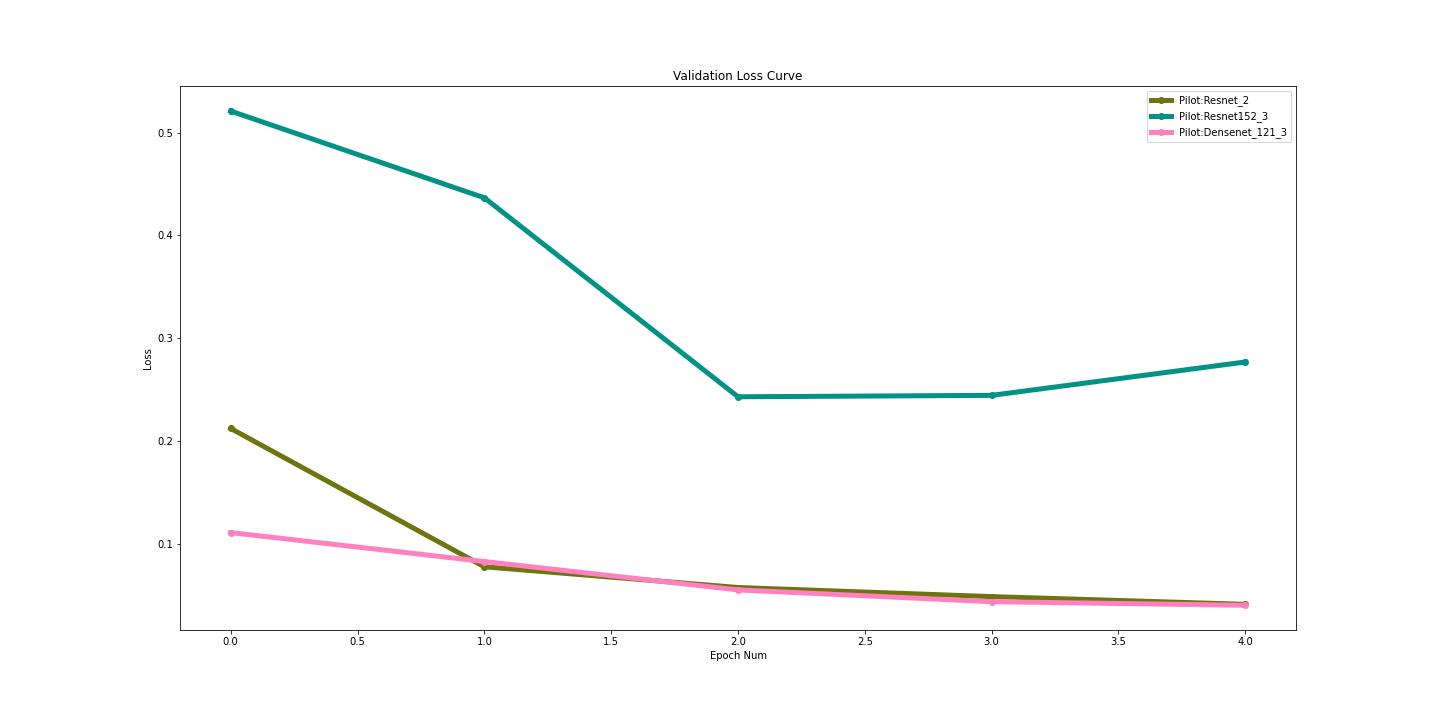

In [62]:
Image(filename="workspace/comparison/Statistics/val_loss.png")